# Project title: Predicting burn size of forest fire

# Business Problem: 

Forest fire is an unwanted,unplanned fire taking place in the forest.These forest fires causing heavy damage economically and environmentally.Causing loss of human lifes and wild life,Fast and effective detection is the key factor in fire fighting.Predicting the fire area at intial stages is very useful in effective allocation of resources and to mitigate the damage.In this project we are going to find out the suitable model to predict the burn size of forest fire

# Source of data:

The dataset has been taken from https://archive.ics.uci.edu/ml/datasets/forest+fires details are collected from the Montesinho natural park, from the Tras-os-Montes northeast region of Portugal.Data contain 517 rows and 13 features

Features:

fire_id - unique id of the forest fire incident

X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: 'jan' to 'dec'

day - day of the week: 'mon' to 'sun'

FFMC - FFMC index from the FWI system: 18.7 to 96.20

DMC - DMC index from the FWI system: 1.1 to 291.3

DC - DC index from the FWI system: 7.9 to 860.6

ISI - ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

Target Attribute:

area - the burned area of the forest (in ha): 0.00 to 1090.84 (This is the target attribute)

# Business constriants:

Low_latency requirement: No need to predict in milli seconds, but don't take too time.It should predict in a minute or half minute

Errors may become costly: Negative error (actual-predict) may be okay but positive error may become costly. i.e if we predict more area than actual  we may allocate more resources that might be not an issue but if we predict less area than actual it will effects the allocation and may turn costly error 

# Performance metrix:

For the evaluation of models we want to use the following metrices:

1.Mean absolute error(MAE): It is the mean of sum of absolute of the residual error (y-y hat).It is less biased to higher values and easier to interpret the performance as it has same units of the y axis.

2.Root mean squared error(RMSE): It is a simple square root of mean squared error.It penalize the large errors and easy to interpret.

In [11]:
## importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
### Setting the figsize for a better vizualization 
plt.rcParams['figure.figsize']=(20,10)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from scipy.sparse import hstack
import pickle


# Data Preprocessing

In [ ]:
## Reading the data
data=pd.read_csv('forestfires.csv')

In [ ]:
print(data.shape)
print(data.columns)
data.head()

(517, 13)
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
## Checking is there any null values
data.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
for i in range(0,100,10):
    perc=np.percentile(data['area'],i)
    print('area below {} percentile:'.format(i),perc)

area below 0 percentile: 0.0
area below 10 percentile: 0.0
area below 20 percentile: 0.0
area below 30 percentile: 0.0
area below 40 percentile: 0.0
area below 50 percentile: 0.52
area below 60 percentile: 2.0059999999999993
area below 70 percentile: 4.6339999999999995
area below 80 percentile: 8.822000000000001
area below 90 percentile: 25.262000000000043


 40 percentile areas are under 0 ha and 50 percemtile areas are under 0.52 ha
 
 only 10 percentile areas are greater than 25.62 ha 

# EDA

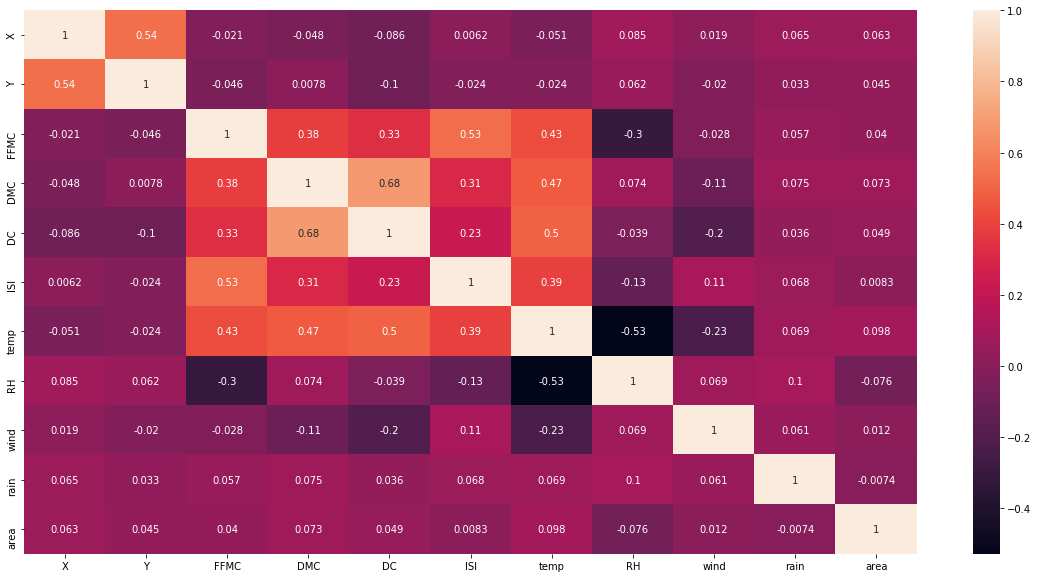

In [ ]:
## Checking for the correlations of the features
corr = data.corr()
sns.heatmap(corr,annot=True)

1.I thought that there would be better correlation between wind and area and rain and area, but by seeing this correaltion map there is very small correlation between them

2.The features DMC and DC are higly correlated  

3.All the three moisture codes are better correlated with temp, as temp increases all the three codes increases

4.The ISI is highly correlated with FFMC,temp as ISI is combination of FFMC and wind

5.For area,Among all the features temp and area are having highest correlation followed by RH,DMC,DC,FFMC


# Univariate analysis

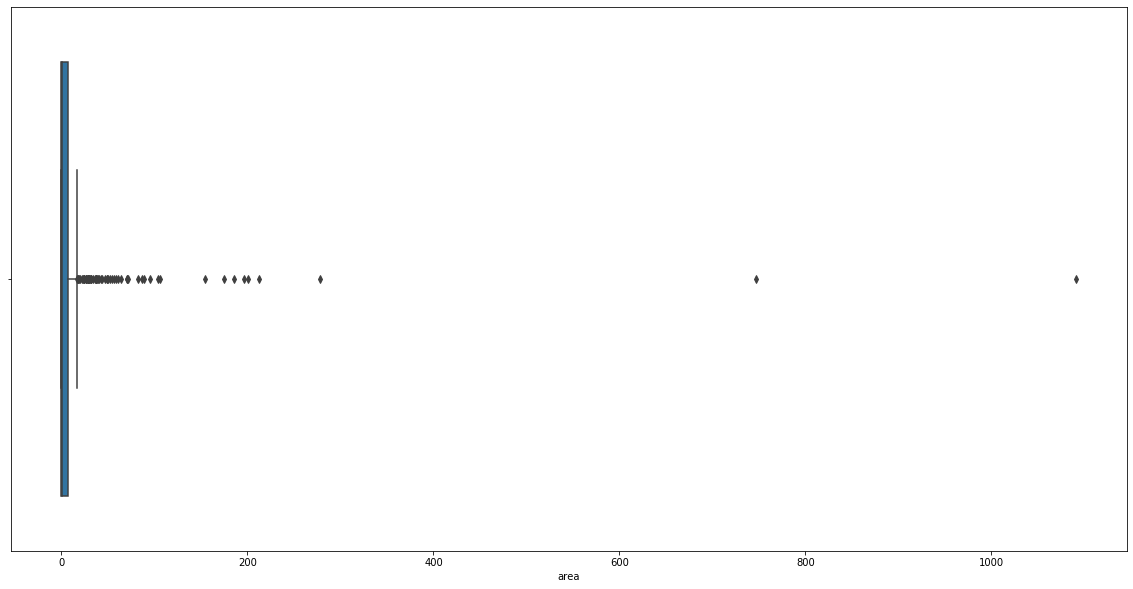

In [ ]:
### Box plot of area or target variable
sns.boxplot(data['area'])

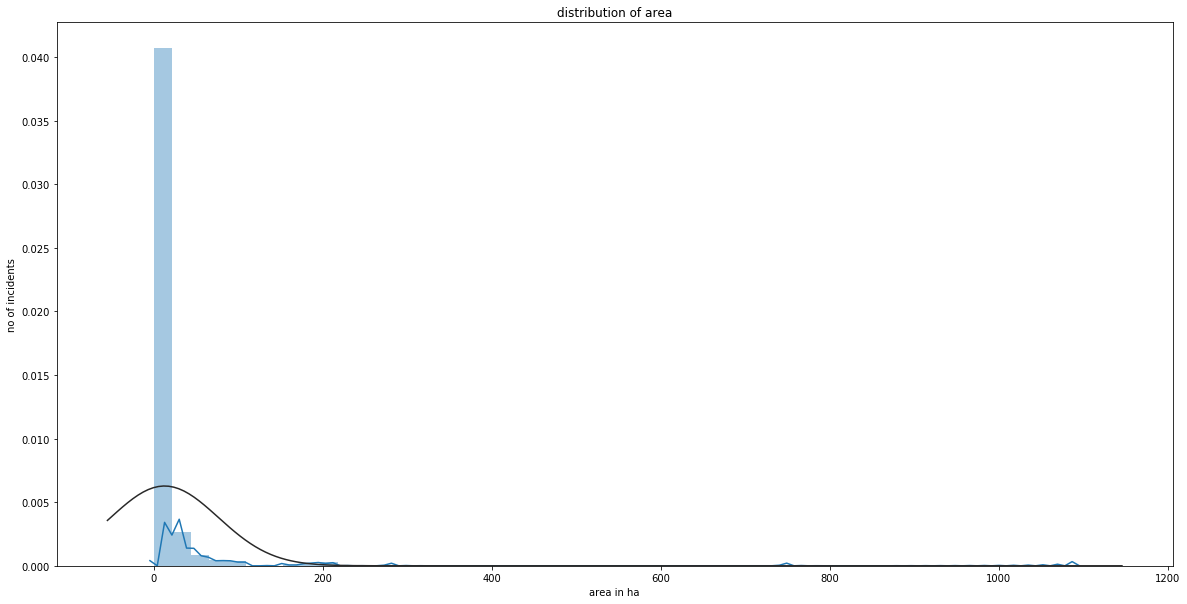

In [ ]:
### Checking the distribution of area
sns.distplot(data.area,fit=norm)
plt.xlabel('area in ha')
plt.ylabel('no of incidents')
plt.title('distribution of area')
plt.show()

From above distribution plot we can say that the data is highly imbalanced, it has positive skewness and not normally distributed.We can use data transformation for the area variable

From literature review we can say that weather features can influence the fire area.So let's check the relation between weather components and area

# Bi variate analysis

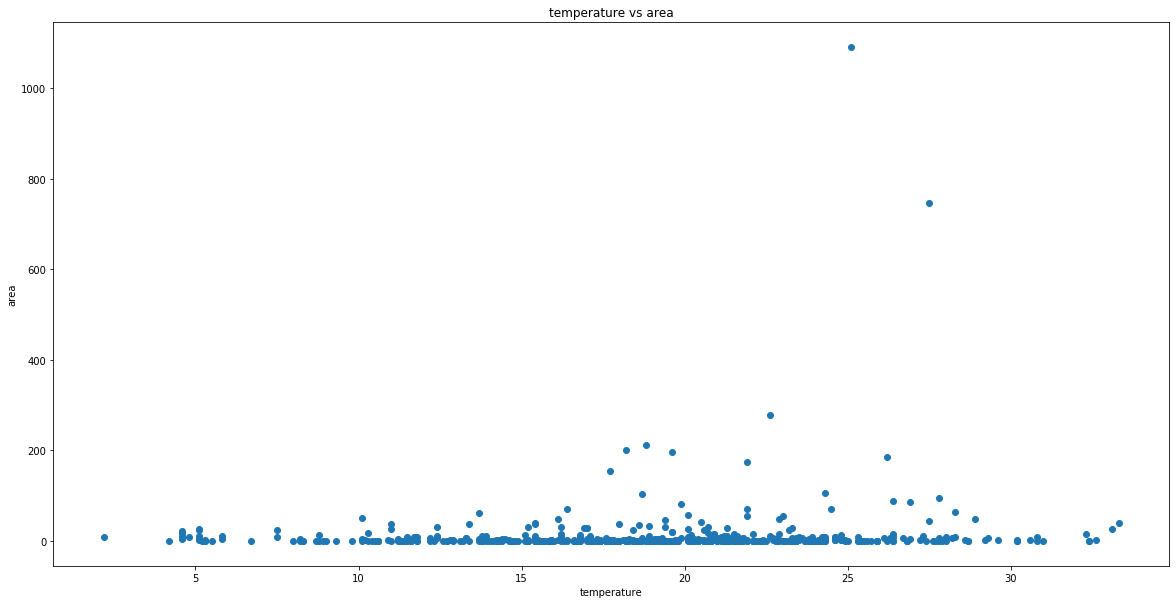

In [ ]:
### Scatter plot between temperature and area
plt.scatter(data['temp'],data['area'])
plt.xlabel('temperature')
plt.ylabel('area')
plt.title('temperature vs area')
plt.show()

Temp having the linear relation with area except few large area points which are very small in numbers. As temp raises the fire area increasing, all the large fires occured between 15 to 30.

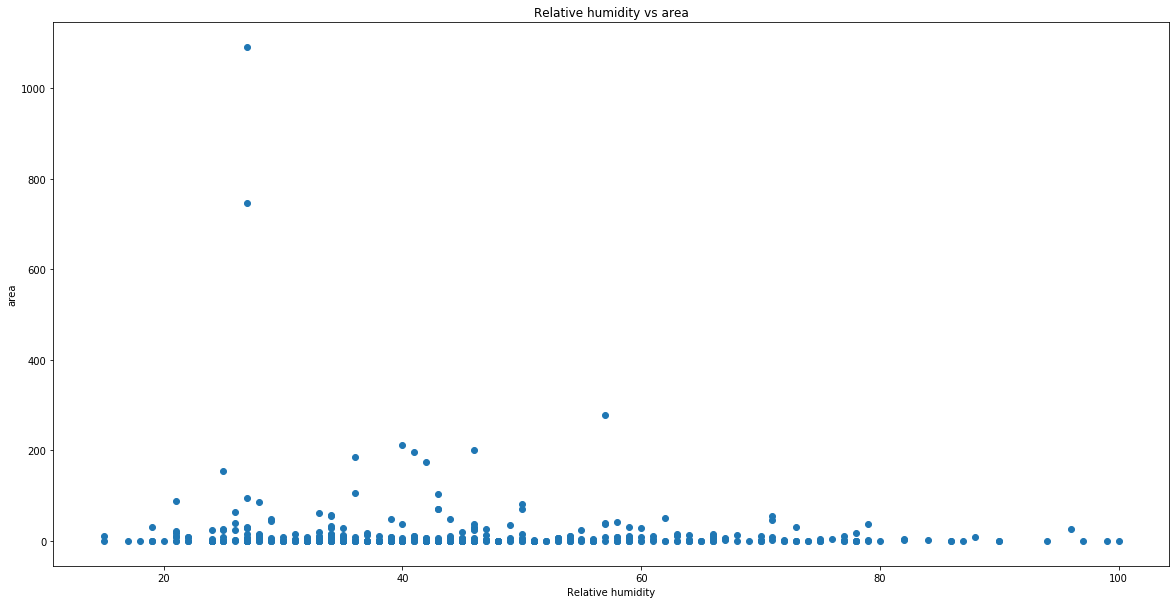

In [ ]:
### Scatter plot between RH and area
plt.scatter(data['RH'],data['area'])
plt.xlabel('Relative humidity')
plt.ylabel('area')
plt.title('Relative humidity vs area')
plt.show()

Relative humidity (RH) can defined as the moisture content avialable in the air,low RH means more dry the air and it will helps the fire to spread fastly and we can observe that all the large fires occured when the RH is less than 50 and as RH increases the fire area decreasing.

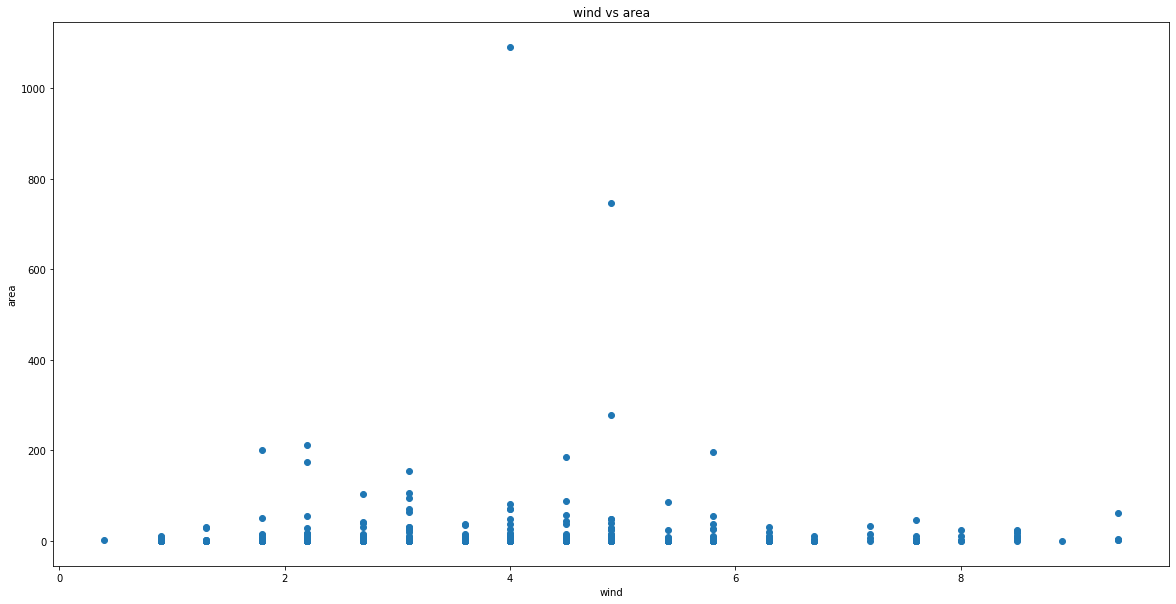

In [ ]:
### Scatter plot between wind and area
plt.scatter(data['wind'],data['area'])
plt.xlabel('wind')
plt.ylabel('area')
plt.title('wind vs area')
plt.show()


We assumed that wind may had the greater influence on fire area. But we can observe that all the large fires happened between 2.0 to 5.5 beyond that even though the wind increases the spreading area is small.This thing we can also observed from the correlation map 

The calm and medium wind speeds helping the fire to spread rapidly,while large speed winds doesn't

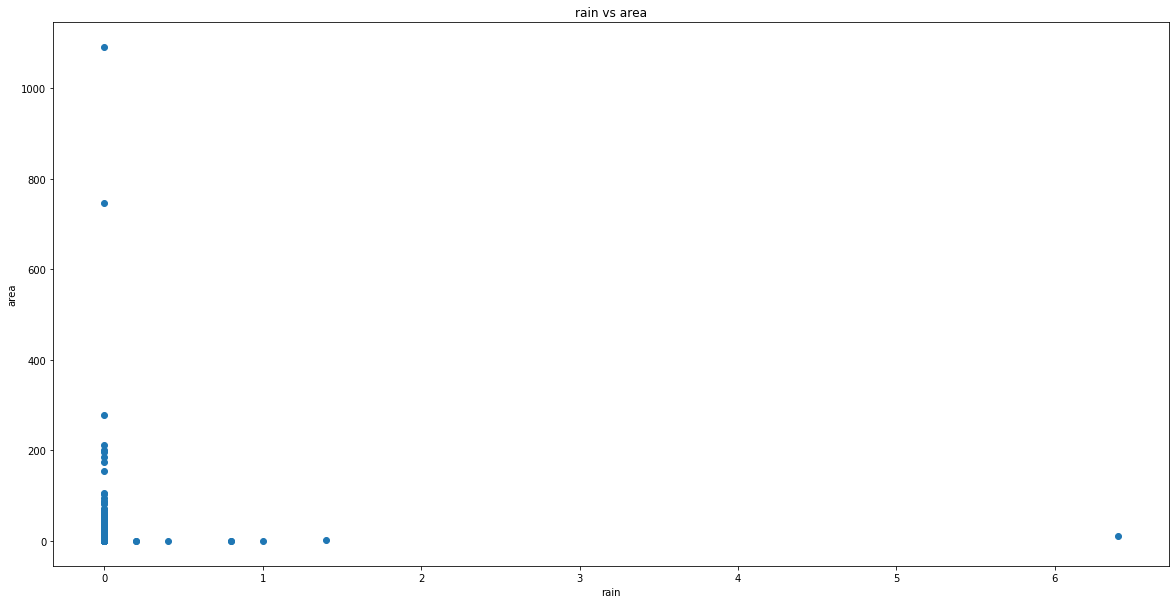

In [ ]:
### Scatter plot between rain and area
plt.scatter(data['rain'],data['area'])
plt.xlabel('rain')
plt.ylabel('area')
plt.title('rain vs area')
plt.show()

All the large fires taken place when rain is 0 as we expected and as rain value increasing fire areas are almost 0. Rain helped to reduce the fire spreading

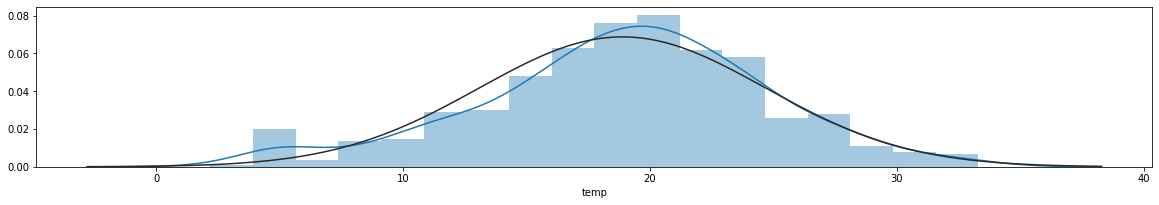

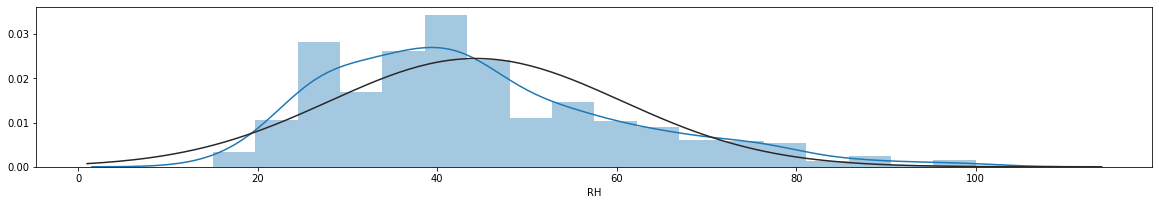

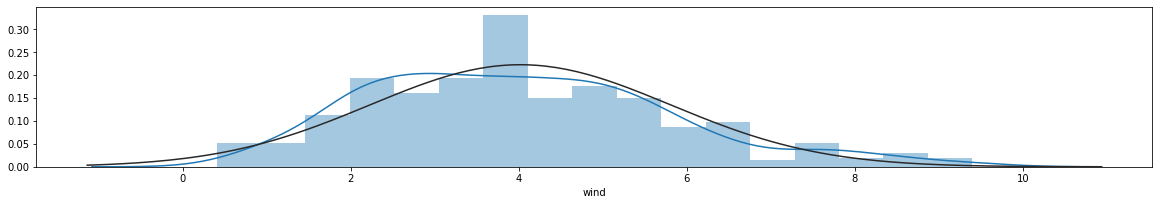

In [ ]:
## Distributions of temp,RH,wind
## Checking the Distributions of weather indices wether they are normally distributed or not
col=['temp','RH','wind']
plt.figure()
for i in range(len(col)):
    plt.subplot(3,1,i+1)
    sns.distplot(data[col[i]],fit=norm)
    plt.show()
    

From the above histograms we can say that temp,wind are nearly normally distributed and RH having positive skewness with data transformatons we can transform them to normally distributed and can check the relationship with area

Temp has a small negative skewness we do data transformations like Squaring,Exponential

RH has a small positive skewness we do data transformations like Log,Root

Wind has a light tailed distribution we do subtractio of data points from median and then apply left skew transformations  

# Now let's check the scatter plots of FWI indices and area

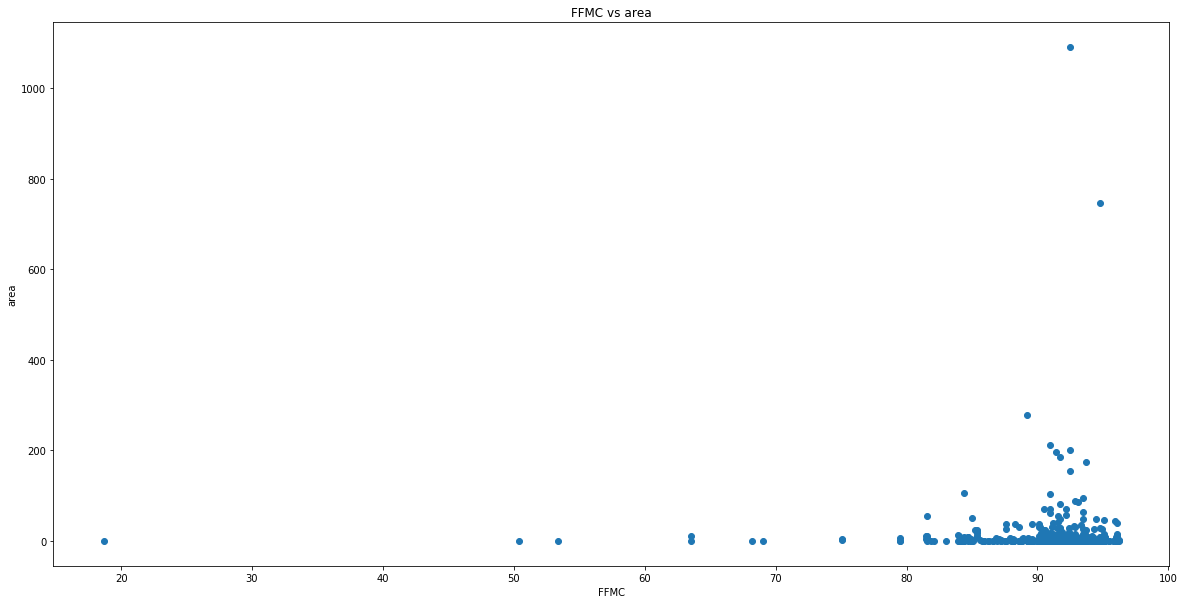

In [ ]:
### Scatter plot between FFMC and area
plt.scatter(data['FFMC'],data['area'])
plt.xlabel('FFMC')
plt.ylabel('area')
plt.title('FFMC vs area')
plt.show()

The major fire accidents taken place at FFMC between 80 to 100 and fires of large areas are occured at FFMC beyond 90. FFMC is the fuel moisture code of litter an increase in it helps for spreading of fire.

Based on the value of FFMC beyond 90 the high,very high and extreme fires occur and it is clear from the plot

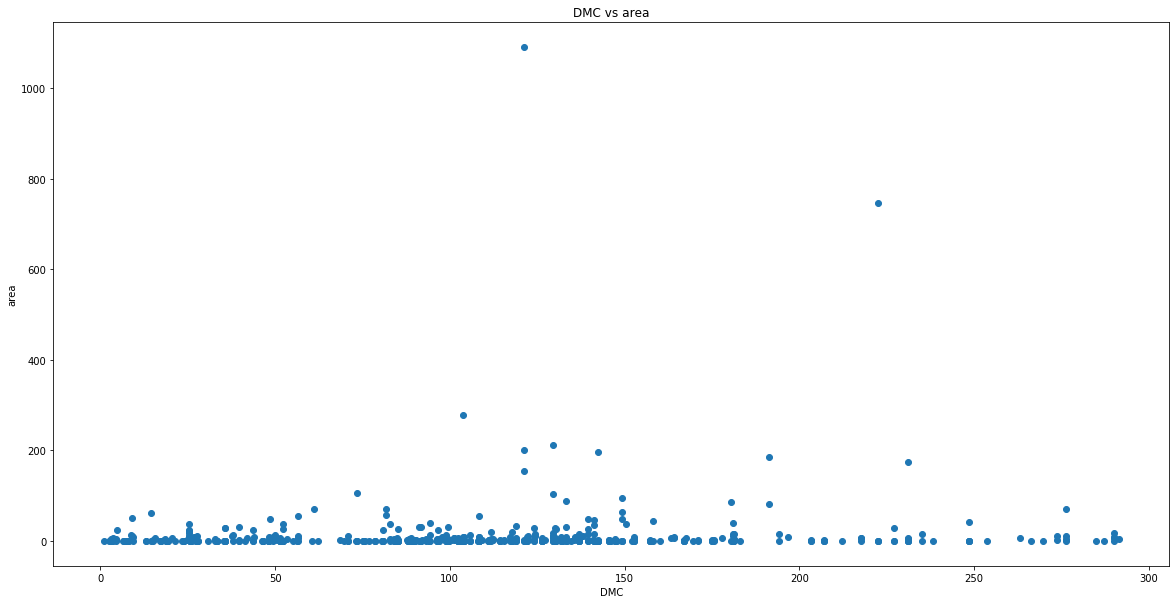

In [ ]:
### Scatter plot between DMC and area
plt.scatter(data['DMC'],data['area'])
plt.xlabel('DMC')
plt.ylabel('area')
plt.title('DMC vs area')
plt.show()

The number of fire incidents spread almost evenly in case of DMC.More number of fires taken place at DMC with in 150 .The fires of area between 0 to 100 ha taken place at DMC between 0 to 200.At DMC 100 to 200 the fires of area greater than 100 ha were occured.

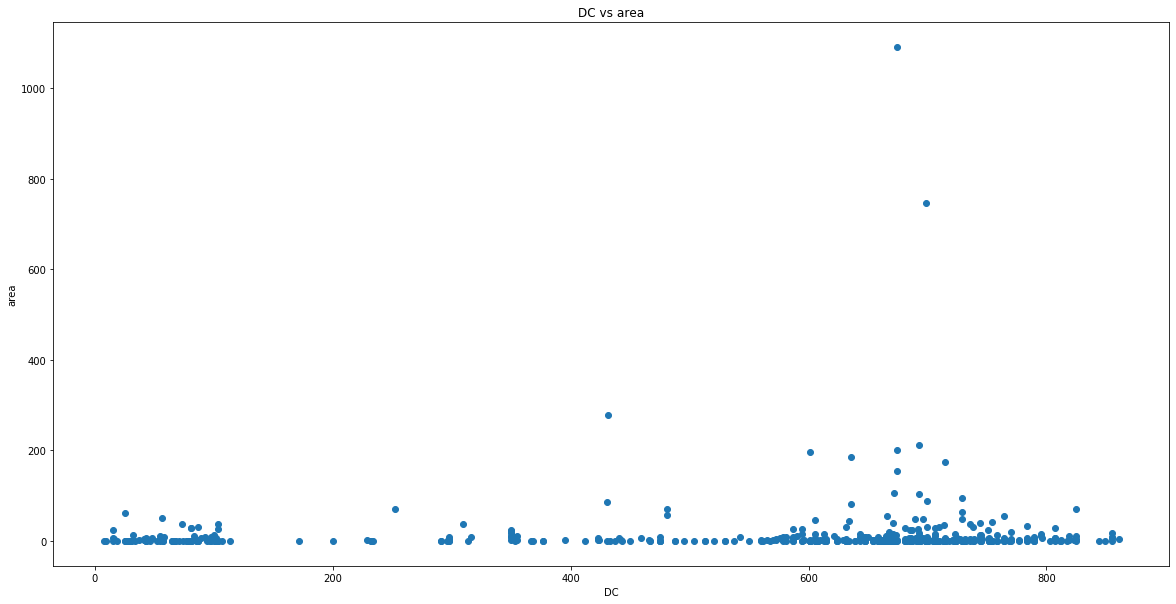

In [ ]:
### Scatter plot between DC and area
plt.scatter(data['DC'],data['area'])
plt.xlabel('DC')
plt.ylabel('area')
plt.title('DC vs area')
plt.show()

As DC increasing the number of fire incidents increasing and fires of large area occured between 600 to 800.More extreme fires occured beyond 400

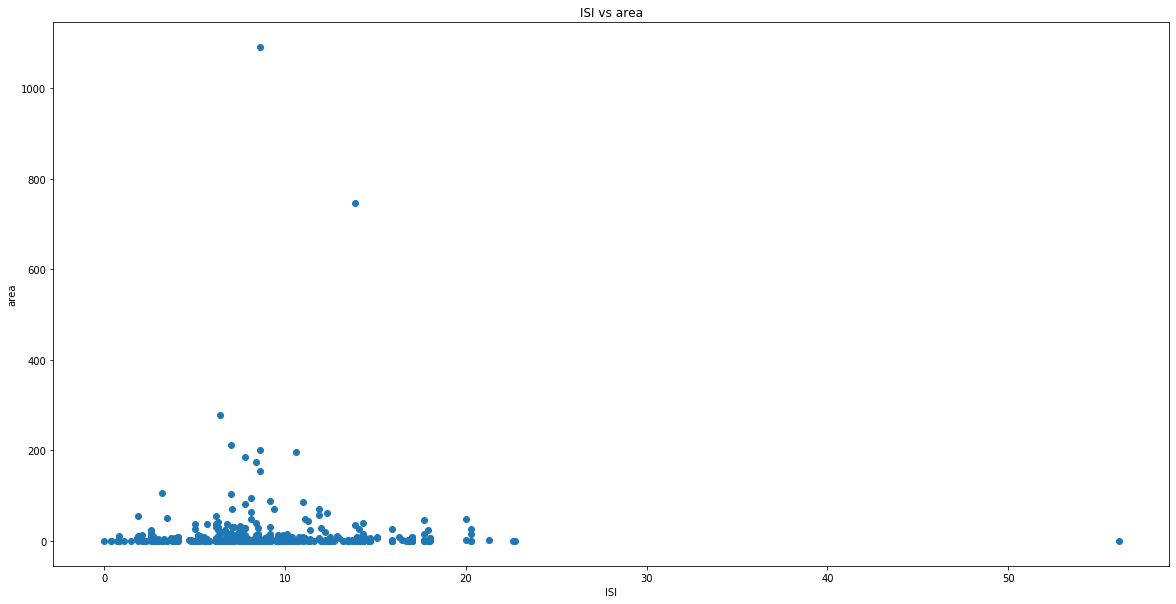

In [ ]:
### Scatter plot between ISI and area
plt.scatter(data['ISI'],data['area'])
plt.xlabel('ISI')
plt.ylabel('area')
plt.title('ISI vs area')
plt.show()

For ISI all the fires taken place between 0 to 20 and fires of large area occured at 5 to 10. ISI is the initial spread index we can interpret as,if ISI increase the fire area should increase but ISI is the combination of wind and FFMC And we saw that the large fires occur at medium wind speed.Hence we can observe all the large fires occur at medium ISI

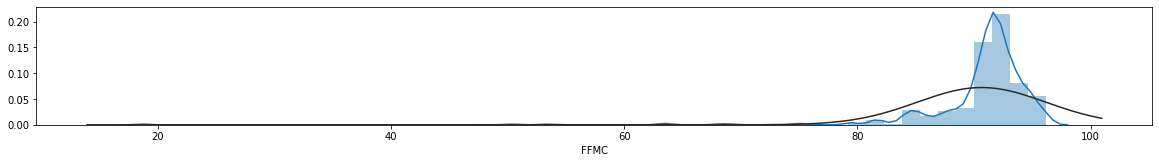

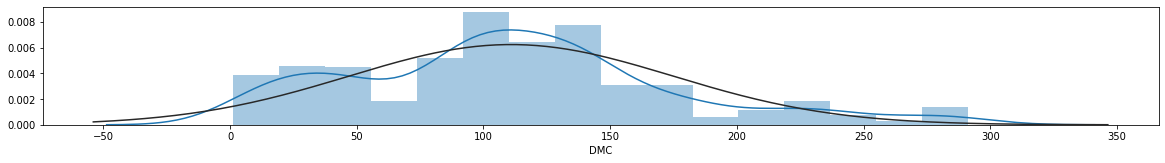

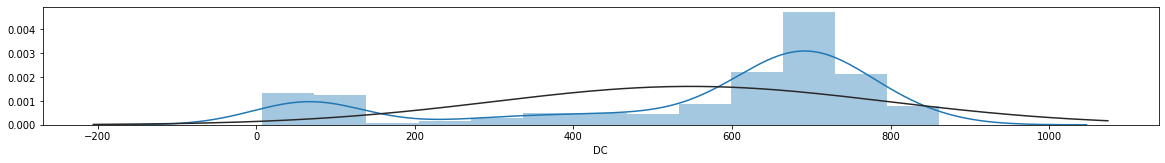

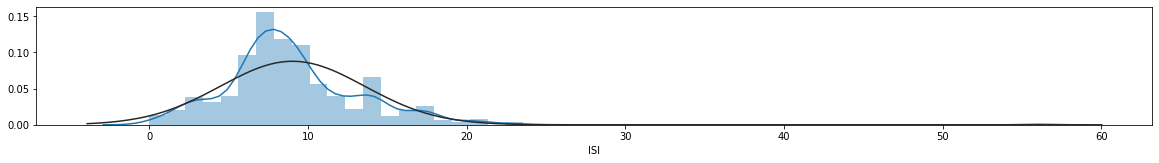

In [ ]:
## Distributions of FWI indices
## Checking the Distributions of weather indices wether they are normally distributed or not

col=['FFMC','DMC','DC','ISI']
plt.figure()
for i in range(len(col)):
    plt.subplot(4,1,i+1)      
    sns.distplot(data[col[i]],hist=True,fit=norm)
    plt.show()

DMC,ISI are having negative and positive skewness and are nearly normal distribution.FFMC and DC are having negative skewness 

We can do the data transformation for the FWI indices and check the relation

FFMC distribution is heavy tailed,DMC and DC are left skewed distributions and ISI has right skewed distribution. We will apply the trasformations accordingly

# Scatter plots of  temporial features

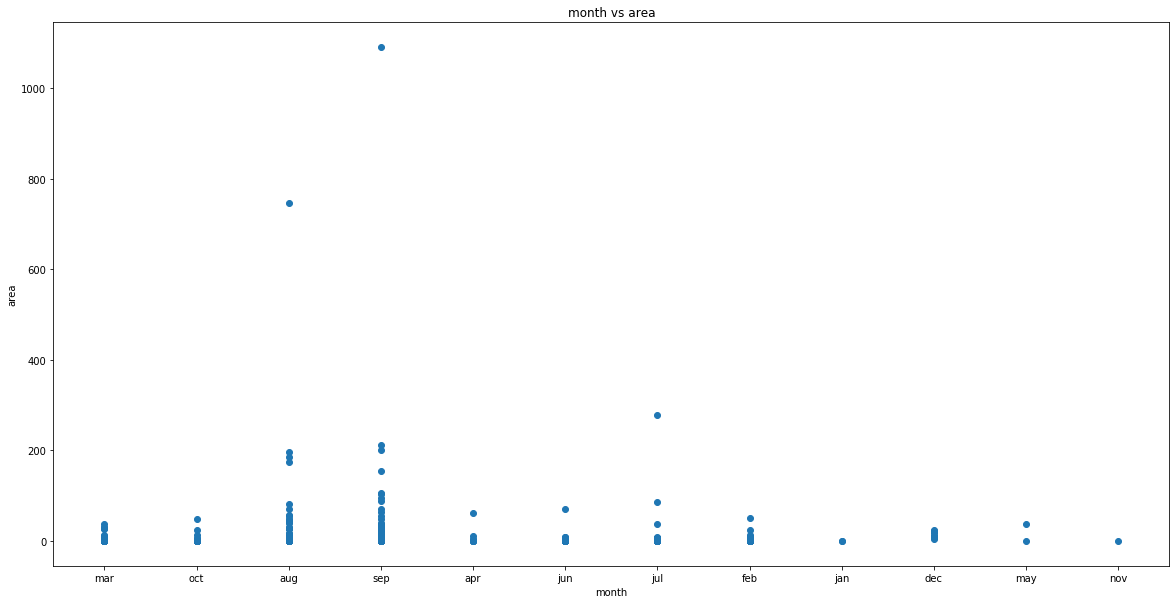

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64


In [ ]:
### scatter plot month vs area
plt.scatter(x=data['month'],y=data['area'])
plt.xlabel('month')
plt.ylabel('area')
plt.title('month vs area')
plt.show()
print(data['month'].value_counts())

From june to september these are the summer months in portugal,major number of incidents happened in these months with sep and aug are at top place.May be due to high temperatures and vacations more number of fire accidents taken place in these months.

Winter season is between Dec to Feb, in these months less number of fire accidents taken place with fire areas less than 50 ha.

Spring season comes from march to may and Atumn season from Oct to Nov, these months are with rainy atmosphere less number of fire accidents taken place in these months.

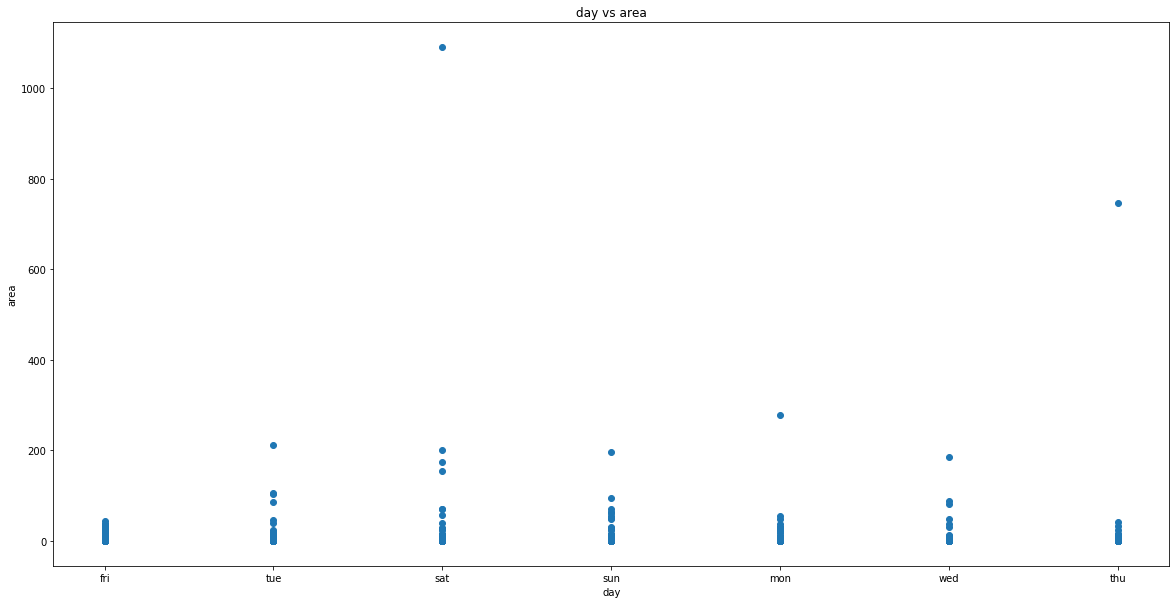

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


In [ ]:
### scatter plot day vs area
plt.scatter(x=data['day'],y=data['area'])
plt.xlabel('day')
plt.ylabel('area')
plt.title('day vs area')
plt.show()
print(data['day'].value_counts())

Most number of incidents happened on weekened days (fri to sun) than week days,may be due to vacations on these days.

# Multi variate analysis

Text(0.5, 1.0, 'X vs Y vs area')

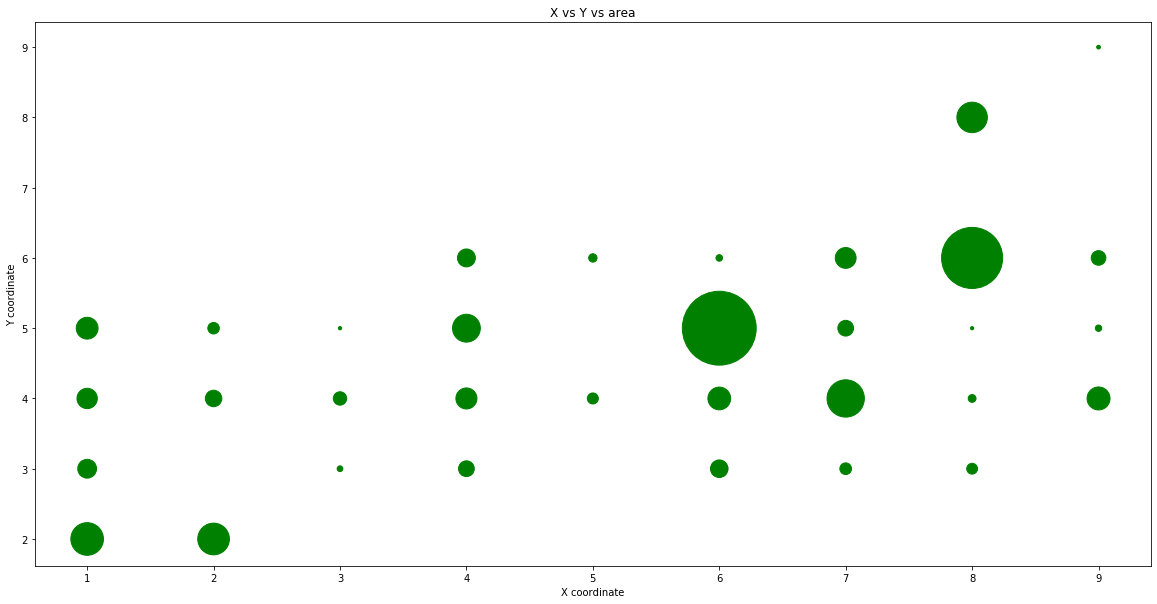

In [ ]:
### Checking the relation of fire area with X and Y Coordinate

plt.scatter(x=data['X'],y=data['Y'],s=data['area']*5,c='g')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('X vs Y vs area')

This co-ordinates are giving the valuable information for us,the major fires taken place at the X coordinate beyond 6 and y coordinate between 3 to 6. This due to,may be this area is easyily accessible to tourists or may be difficult terrain to control the fire or may be the fire controlling equipments and fire station far away from this area or anything else. 

Between X coordinate between 1 to 5 and Y coordinate between 2 to 6 small and medium range fires taken place.

So we can give more importance to the above mentioned coordinates

Beyond Y coordinate there is very small or no fires taken place.We can give very small importance to this area

From the above observations we can create a new feature X_Y as shown below

In [ ]:
### Creating new feature by giving more importance to the corresponding coordinates

X_Y=[]
for i in range(len(data['Y'].values)):
    if data['Y'][i]<7:
        new=0.6*data['X'][i]+0.4*data['Y'][i]
        X_Y.append(new)
    if data['Y'][i]>=7:
        new=0.9*data['X'][i]+0.1*data['Y'][i]
        X_Y.append(new)

C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


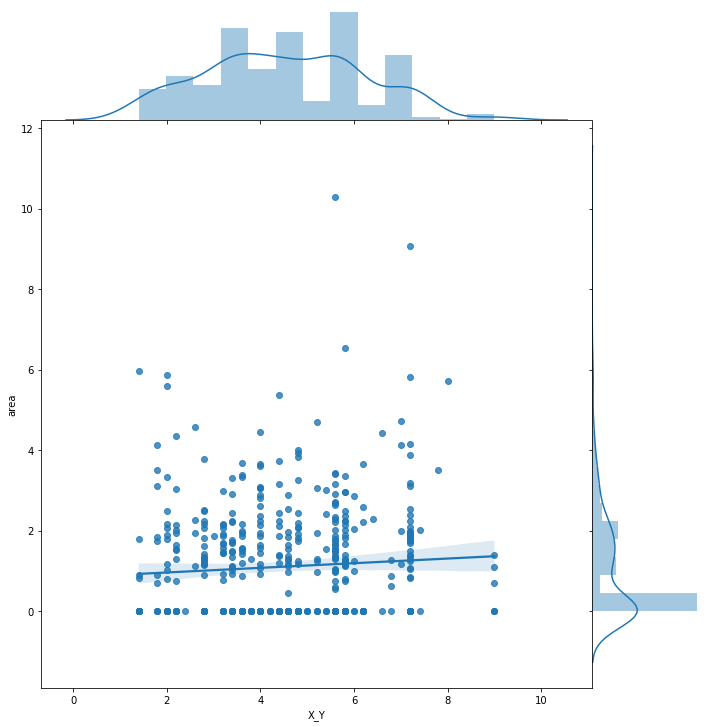

In [ ]:
### Checking the new feature relation with the area

sns.jointplot(x=X_Y, y=np.cbrt(data['area']), 
                   kind='reg', space=0, size=10, ratio=5)
plt.xlabel('X_Y')
plt.ylabel('area')
plt.title('X_Y vs area')
plt.show()

The new feature having normal distribution and showing linearity with the transformed area

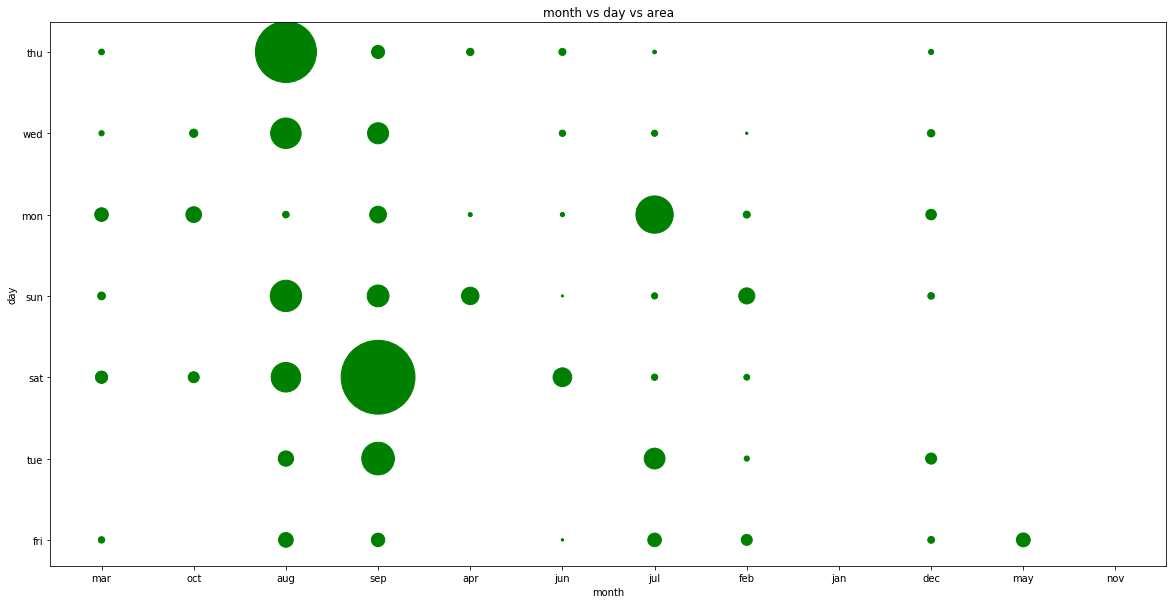

In [ ]:
### Checking the relation of fire area with month and day
plt.scatter(x=data['month'],y=data['day'],s=data['area']*5,c='g')
plt.xlabel('month')
plt.ylabel('day')
plt.title('month vs day vs area')
plt.show()

More number of fires happened in the months of aug and sep.Very less or zero fires occured in the months of oct,apr,jan,may and nov.In the remaining months moderate number of incidents happened.

From this observation we can create a new feature M_D by giving more importance for sep and aug months and moderate importance to the months with less number of fires and very less importance to the months with very less or zero number of incidents.

In [ ]:
#### Creating a new feature M_D

M_D=[]
for i in range(len(data['day'].values)):
    
    #### Giving very less weightage to these months
    if data['month'][i]=='jan'or data['month'][i]=='may' or data['month'][i]=='nov':
        M_D.append(np.random.normal(0.0,0.3,1)[0])
        
    ### Giving more weightage to these months  
    if data['month'][i]=='aug' or data['month'][i]=='sep':
        M_D.append(np.random.normal(0.7,1,1)[0])
        
    ### Giving moderate weightage to this month
    if data['month'][i]=='jul':
        M_D.append(np.random.normal(0.6,0.7,1)[0])
        
    ### Giving less weightage to these months  
    if data['month'][i]=='feb' or data['month'][i]=='mar' or data['month'][i]=='apr' or data['month'][i]=='jun' or data['month'][i]=='oct' or data['month'][i]=='dec':         
        M_D.append(np.random.normal(0.3,0.6,1)[0])

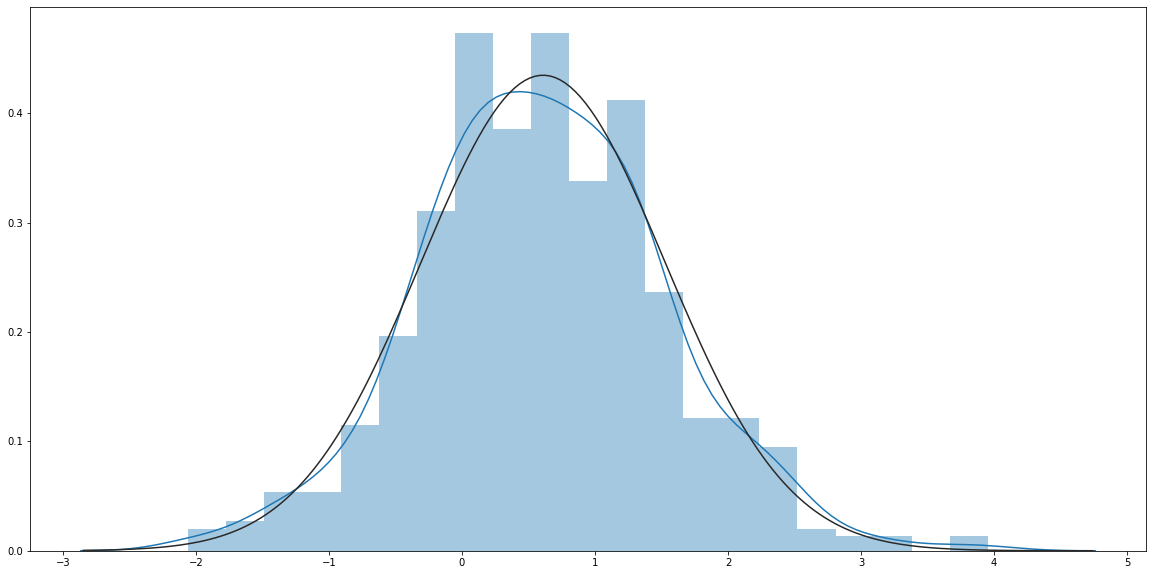

In [ ]:
sns.distplot(M_D,fit=norm)

C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


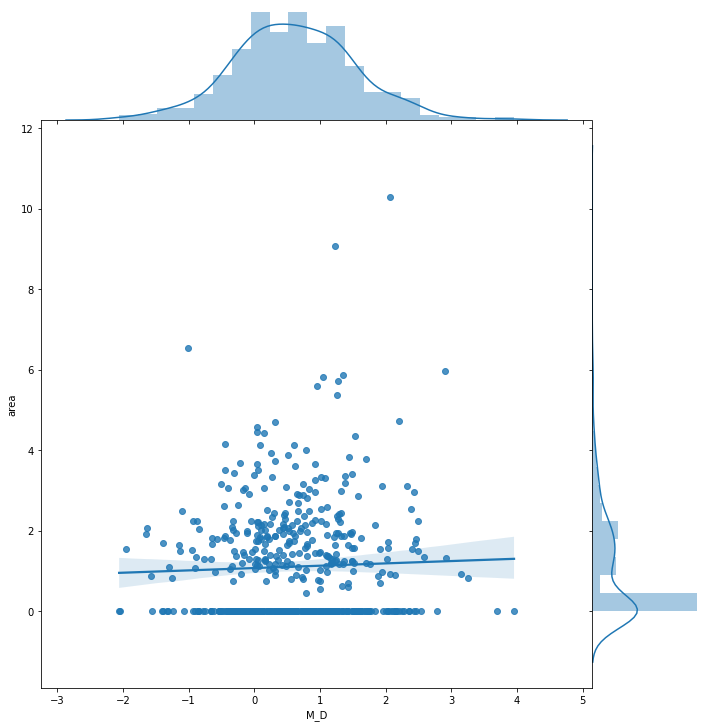

In [ ]:
### Checking the new feature relation with the area

sns.jointplot(x=M_D, y=np.cbrt(data['area']), 
                  kind='reg',  space=0, size=10, ratio=5)
plt.xlabel('M_D')
plt.ylabel('area')
plt.title('M_D vs area')
plt.show()

The new feature having normal distribution and showing linearity with the transformed area

Text(0.5, 1.0, 'temp vs RH vs area')

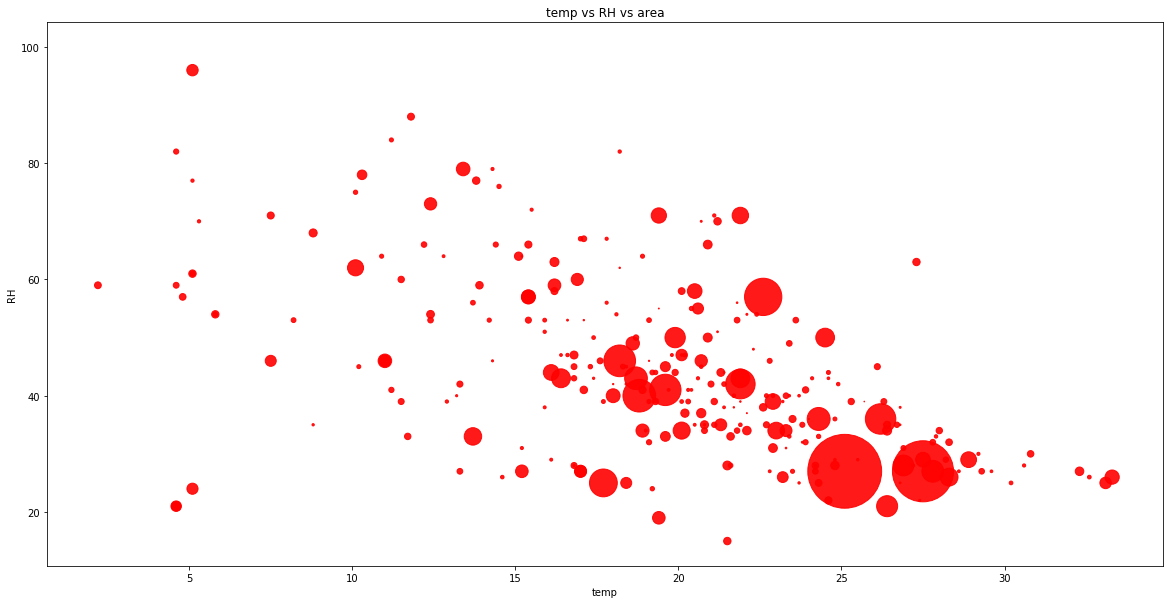

In [ ]:
### Checking the relation of fire area with temperature and RH

plt.scatter(data['temp'], data['RH'], s=data['area']*5, c='r',
            alpha=0.9)
plt.xlabel('temp')
plt.ylabel('RH')
plt.title('temp vs RH vs area')

At higher temperature and lower relative humidity large fires were taken place.As we know relative humidity is inversly proportional to temperature,i.e if temperature increases the hotness in air increases and it causes less relative humidity and create the better conditions for fire spreading.

Text(0.5, 1.0, 'temp vs wind vs area')

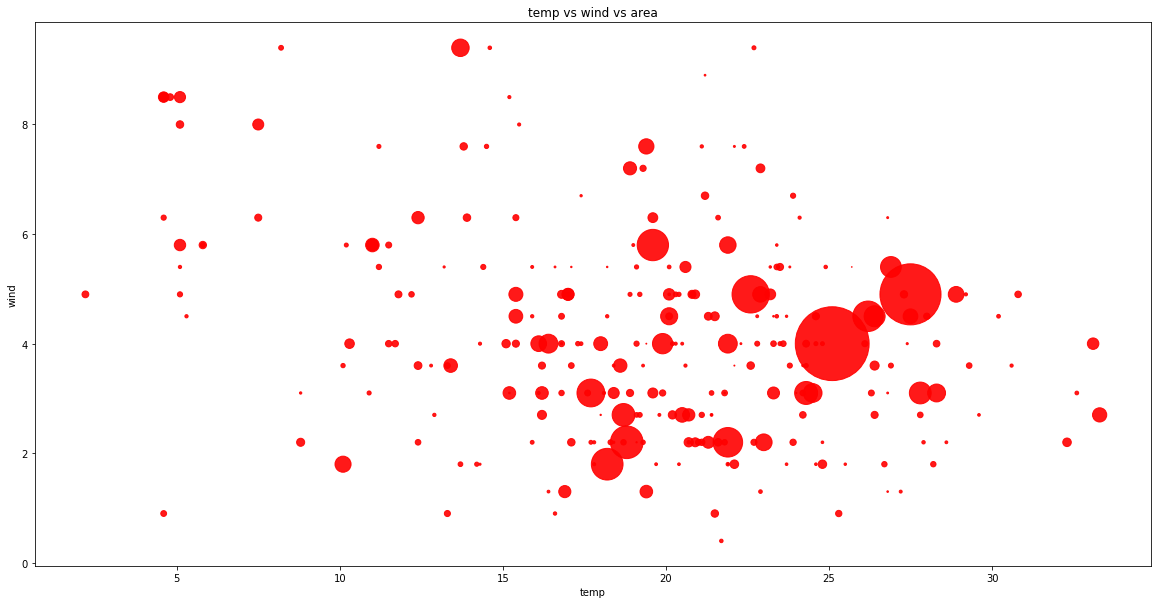

In [ ]:
### Checking the relation of fire area with temperature and wind

plt.scatter(data['temp'], data['wind'], s=data['area']*5, c='r',
            alpha=0.9)
plt.xlabel('temp')
plt.ylabel('wind')
plt.title('temp vs wind vs area')

At moderate wind speed as temperature increasing the fire area also increasing,here higher temperatures causing the more spreading.But at moderate temperature even though the wind speed is high the chances of more spreading are low

From above two plots it is clear that at high temperature,low relative humidity and at moderate wind speed the spreading rate is more.

Using this observation We can create a new feature with these three features with temp having more weightage and RH,wind havin g less weightages

TRW=temp*0.55+RH*0.3+wind*0.15

C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


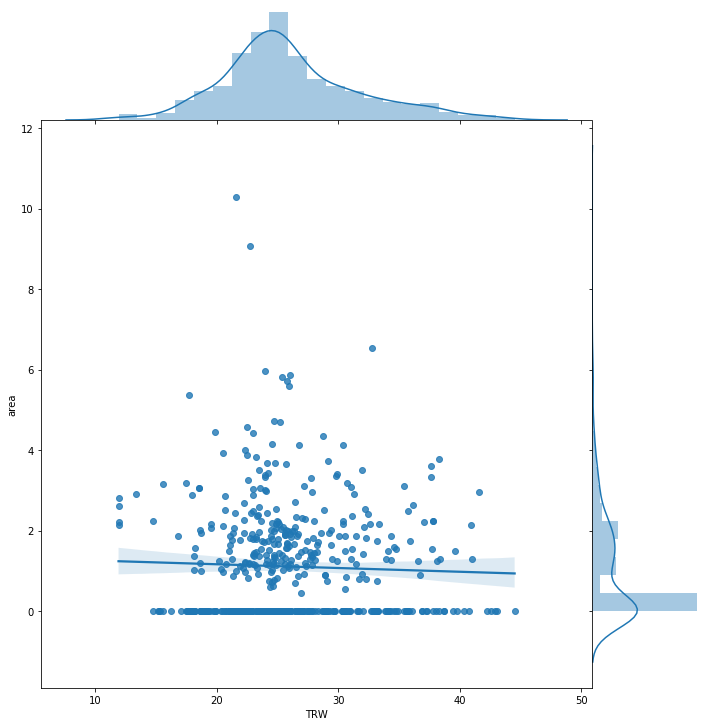

In [ ]:
### Checking the new feature relation with the area

sns.jointplot(x=(data['temp']*0.4+data['RH']*0.4+data['wind']*0.20), y=np.cbrt(data['area']), 
                   kind='reg', space=0, size=10, ratio=5)
plt.xlabel('TRW')
plt.ylabel('area')
plt.title('TRW vs area')
plt.show()

Intrestingly the new feature is normally distributed and had some linearity with transformed area.

Text(0.5, 1.0, 'temp vs FFMC vs area')

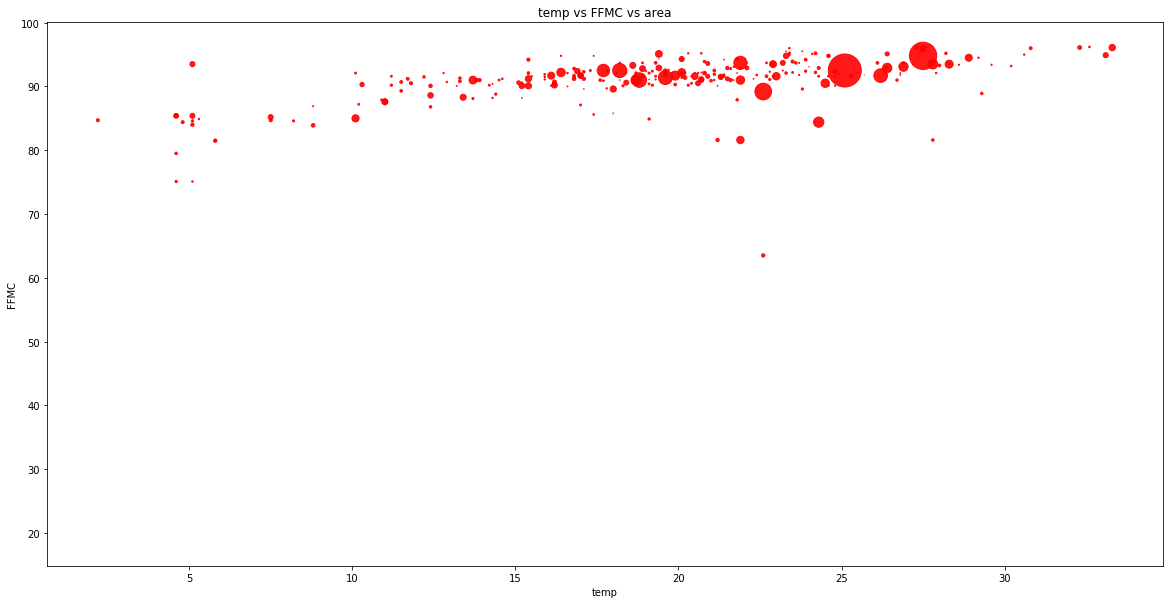

In [ ]:
plt.scatter(data['temp'], data['FFMC'], s=data['area'], c='r',
            alpha=0.9)
plt.xlabel('temp')
plt.ylabel('FFMC')
plt.title('temp vs FFMC vs area')

Text(0.5, 1.0, 'FFMC vs DMC vs area')

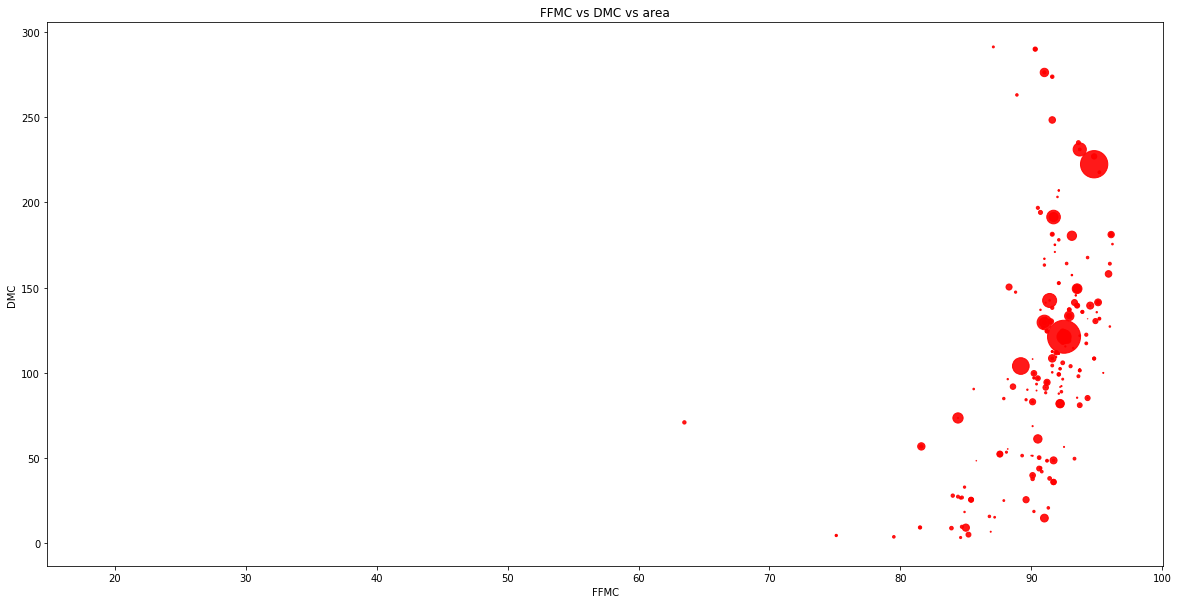

In [ ]:
plt.scatter(data['FFMC'], data['DMC'], s=data['area'], c='r',
            alpha=0.9)
plt.xlabel('FFMC')
plt.ylabel('DMC')
plt.title('FFMC vs DMC vs area')

At higher FFMC and temperatures the fire spreading is more

# Data Transformations

We are converting the distribution of features and target variables to normal distribution to check linearity with each other,it will help us in increaing the performance of linear models and to use statistical assumptions i.e 95% CI rule

1.Transforming the area: As area having right skewness we will apply both the Log and Root transformations and will choose the best

Text(0.5, 1.0, 'cbrt_transform')

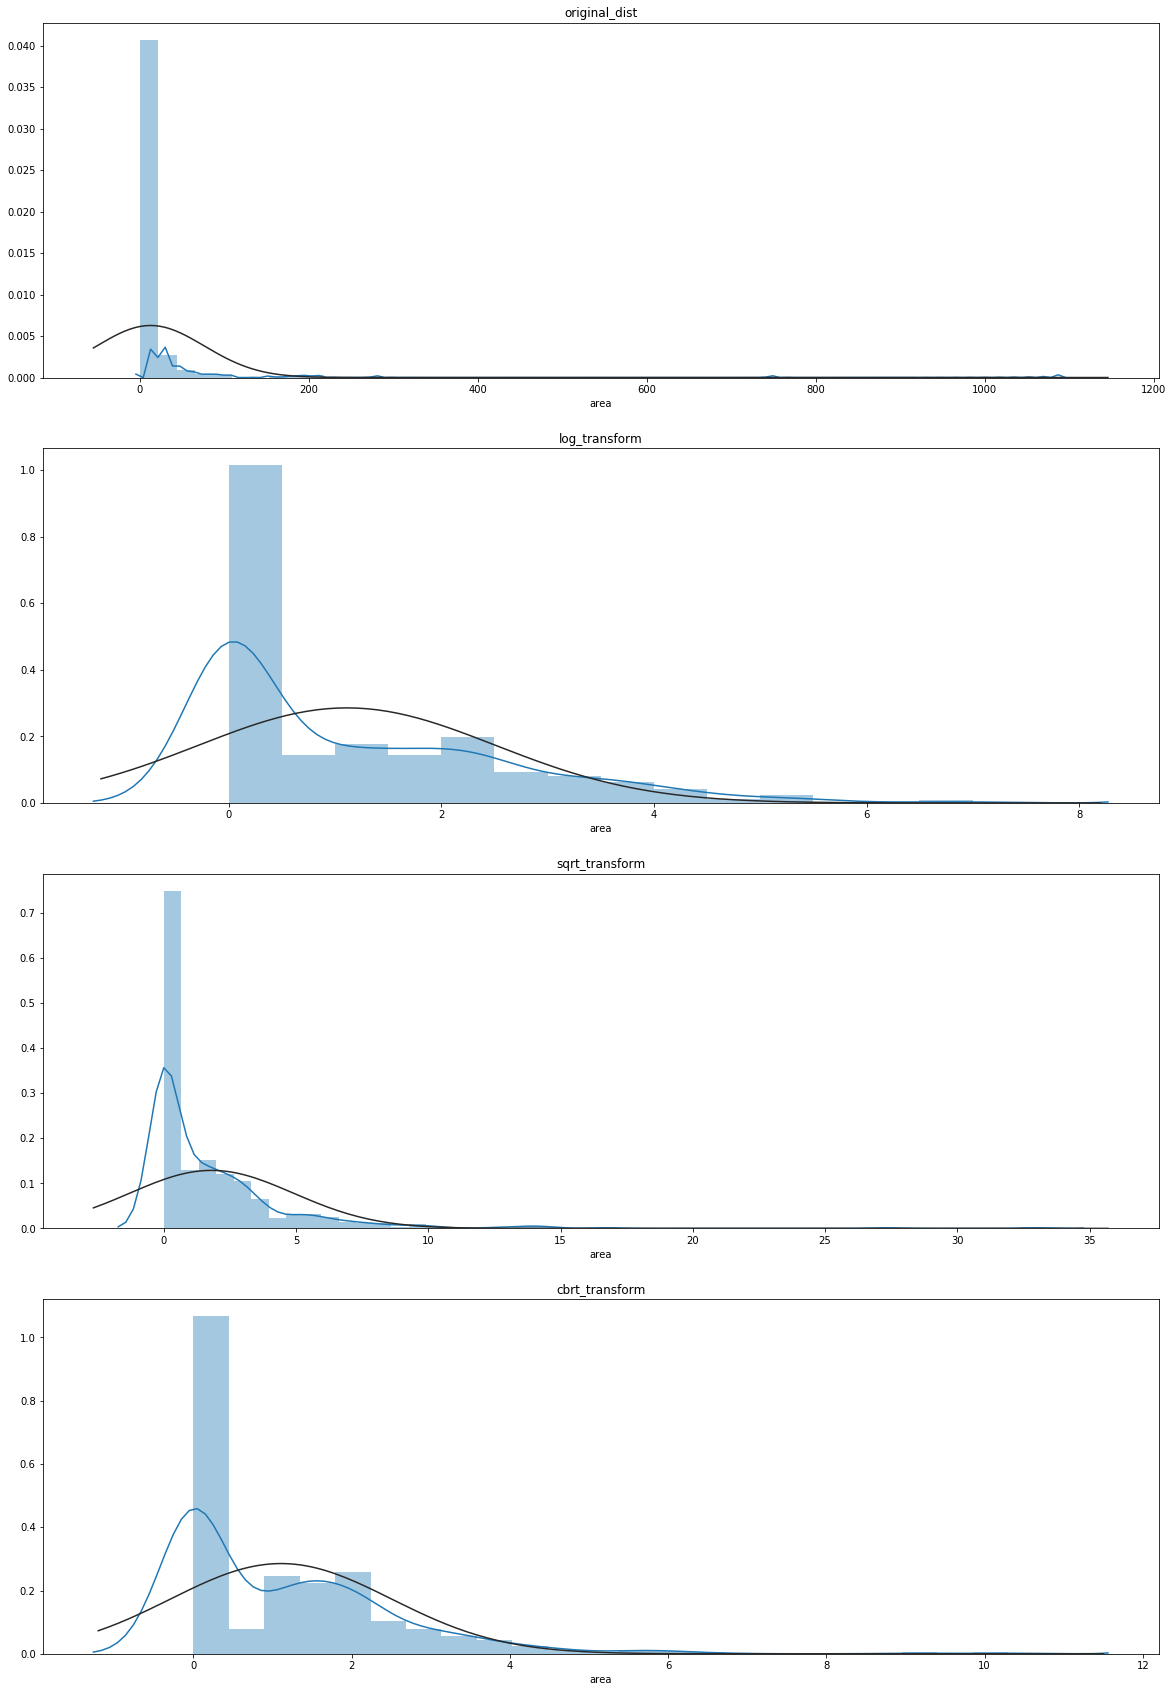

In [ ]:
## Checking which transformation is best by plotting and comparing the distributions
## Creating subplots with 4 rows and one column

fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(20,30))

sns.distplot(data['area'],fit=norm,ax=ax1) ## Plotting the distributon of original values of area
ax1.set_title('original_dist')

sns.distplot(np.log(data['area']+1),fit=norm,ax=ax2) ## Plotting the distributon of Log transformed values of area
ax2.set_title('log_transform')

sns.distplot(np.sqrt(data['area']),fit=norm,ax=ax3)  ## Plotting the distributon of Sqrt transformed values of area
ax3.set_title('sqrt_transform')

sns.distplot(np.cbrt(data['area']),fit=norm,ax=ax4)  ## Plotting the distributon of Cbrt transformed values of area
ax4.set_title('cbrt_transform')

Among all the transformations, Cube root function giving the better distribution. The gap between the normal distribution and Pdf of area is small in Cube root compared to the all other functions.Hence,we may continue with the cube root transformation

In [ ]:
### Adding the cube root transformed area value column to the data

data['area_cbrt']=np.cbrt(data['area'])
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_cbrt
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


2.Transforming the weather indices: Depending on the skewness of those indices we will apply different transformations and select  the best

Text(0.5, 1.0, 'Sqrt_dist')

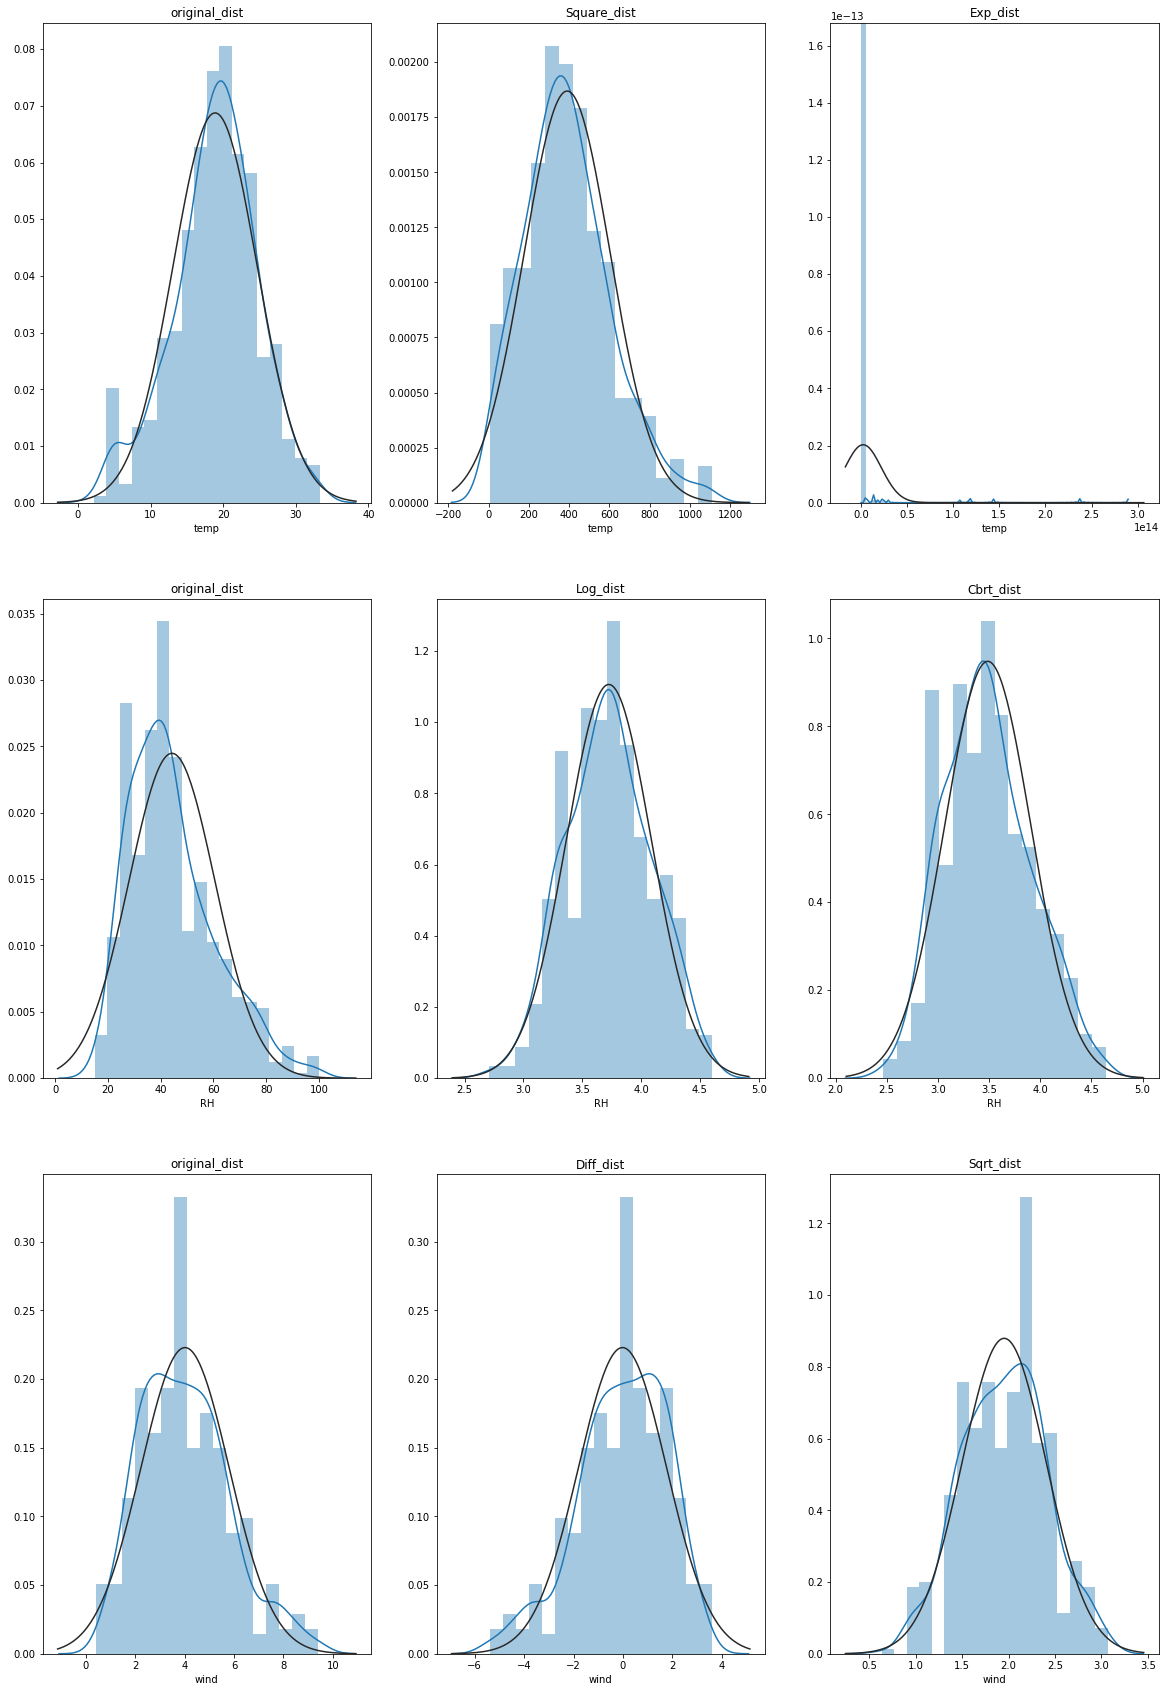

In [ ]:
## Checking which transformation is best by plotting and comparing the distributions
## Creating subplots with 3 rows and 3 columns
## We have already seen the distributions of these indices above based on those we will apply transformations

fig,axes=plt.subplots(3,3,figsize=(20,30))


## Plotting the original distributons of temp index
sns.distplot(data['temp'],fit=norm,ax=axes[0][0]) 
axes[0][0].set_title('original_dist')

## As temp having left skewness we are apllying Square,exponential Transformations and 
##Plotting the Square,exp distributons of temp index

sns.distplot(np.square(data['temp']),fit=norm,ax=axes[0][1]) 
axes[0][1].set_title('Square_dist')

sns.distplot(np.exp(data['temp']),fit=norm,ax=axes[0][2]) 
axes[0][2].set_title('Exp_dist')


## Plotting the original distributons of RH index
sns.distplot(data['RH'],fit=norm,ax=axes[1][0]) 
axes[1][0].set_title('original_dist')

## As RH having Right skewness we are apllying Log,Cbrt Transformations and 
##Plotting the Log,Cbrt distributons of RH index

sns.distplot(np.log(data['RH']),fit=norm,ax=axes[1][1]) 
axes[1][1].set_title('Log_dist')

sns.distplot(np.cbrt(data['RH']),fit=norm,ax=axes[1][2]) 
axes[1][2].set_title('Cbrt_dist')


## Plotting the original distributons of wind index
sns.distplot(data['wind'],fit=norm,ax=axes[2][0]) 
axes[2][0].set_title('original_dist')

## As wind having Light tailed skewness we are subtracting all the values from median and plotting distribution then we decide the transformation
##Plotting the  distributons of difference of wind index

sns.distplot((np.median(data['wind'])-data['wind']),fit=norm,ax=axes[2][1]) 
axes[2][1].set_title('Diff_dist')

## sqrt giving better results than cbrt
## plotting the sqrt distribution of wind index
sns.distplot(np.sqrt(data['wind']),fit=norm,ax=axes[2][2]) 
axes[2][2].set_title('Sqrt_dist')



For temperature Original distribution is better than the transformations and we will keep it as it is

For RH the Cube root transformation giving the better results and we will apply it

And for wind the Sqrt working better than all the other transformations

In [ ]:
### Adding the transformed values of weather indices to the data

data['RH_cbrt']=np.cbrt(data['RH']).round(2)
data['wind_sqrt']=np.sqrt(data['wind']).round(2)
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_cbrt,RH_cbrt,wind_sqrt
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,3.71,2.59
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,3.21,0.95
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,3.21,1.14
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,4.59,2.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,4.63,1.34


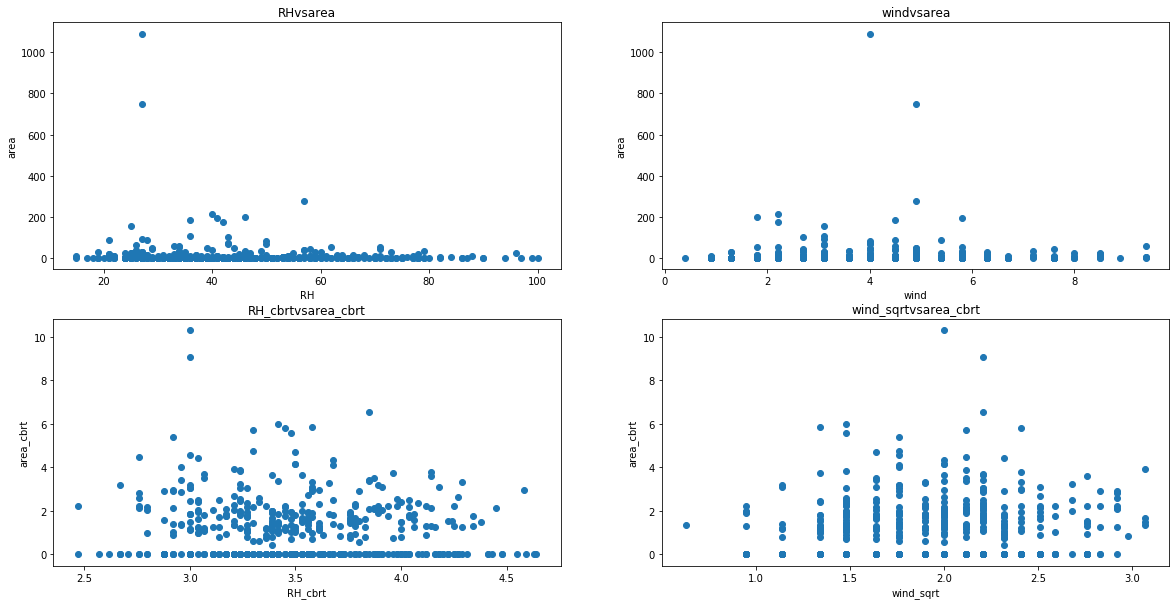

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(20,10))
init_col=['RH','wind']
tran_col=['RH_cbrt','wind_sqrt']
for i in range(2):
    for j in range(2):
        if i==0:
            axes[i][j].scatter(data[init_col[j]],data['area'])
            axes[i][j].set_title(init_col[j] + 'vs' + 'area')
            axes[i][j].set_xlabel(init_col[j])
            axes[i][j].set_ylabel('area')
            
        if i==1:
            axes[i][j].scatter(data[tran_col[j]],data['area_cbrt'])
            axes[i][j].set_title(tran_col[j] + 'vs' + 'area_cbrt')
            axes[i][j].set_xlabel(tran_col[j])
            axes[i][j].set_ylabel('area_cbrt')


After Transformations the variance increased and linearity also increased.It will helps in reducing the error

3.Transforming the FWI indices: Depending on the skewness of those indices we will apply different transformations and select the best

Text(0.5, 1.0, 'cbrt_dist')

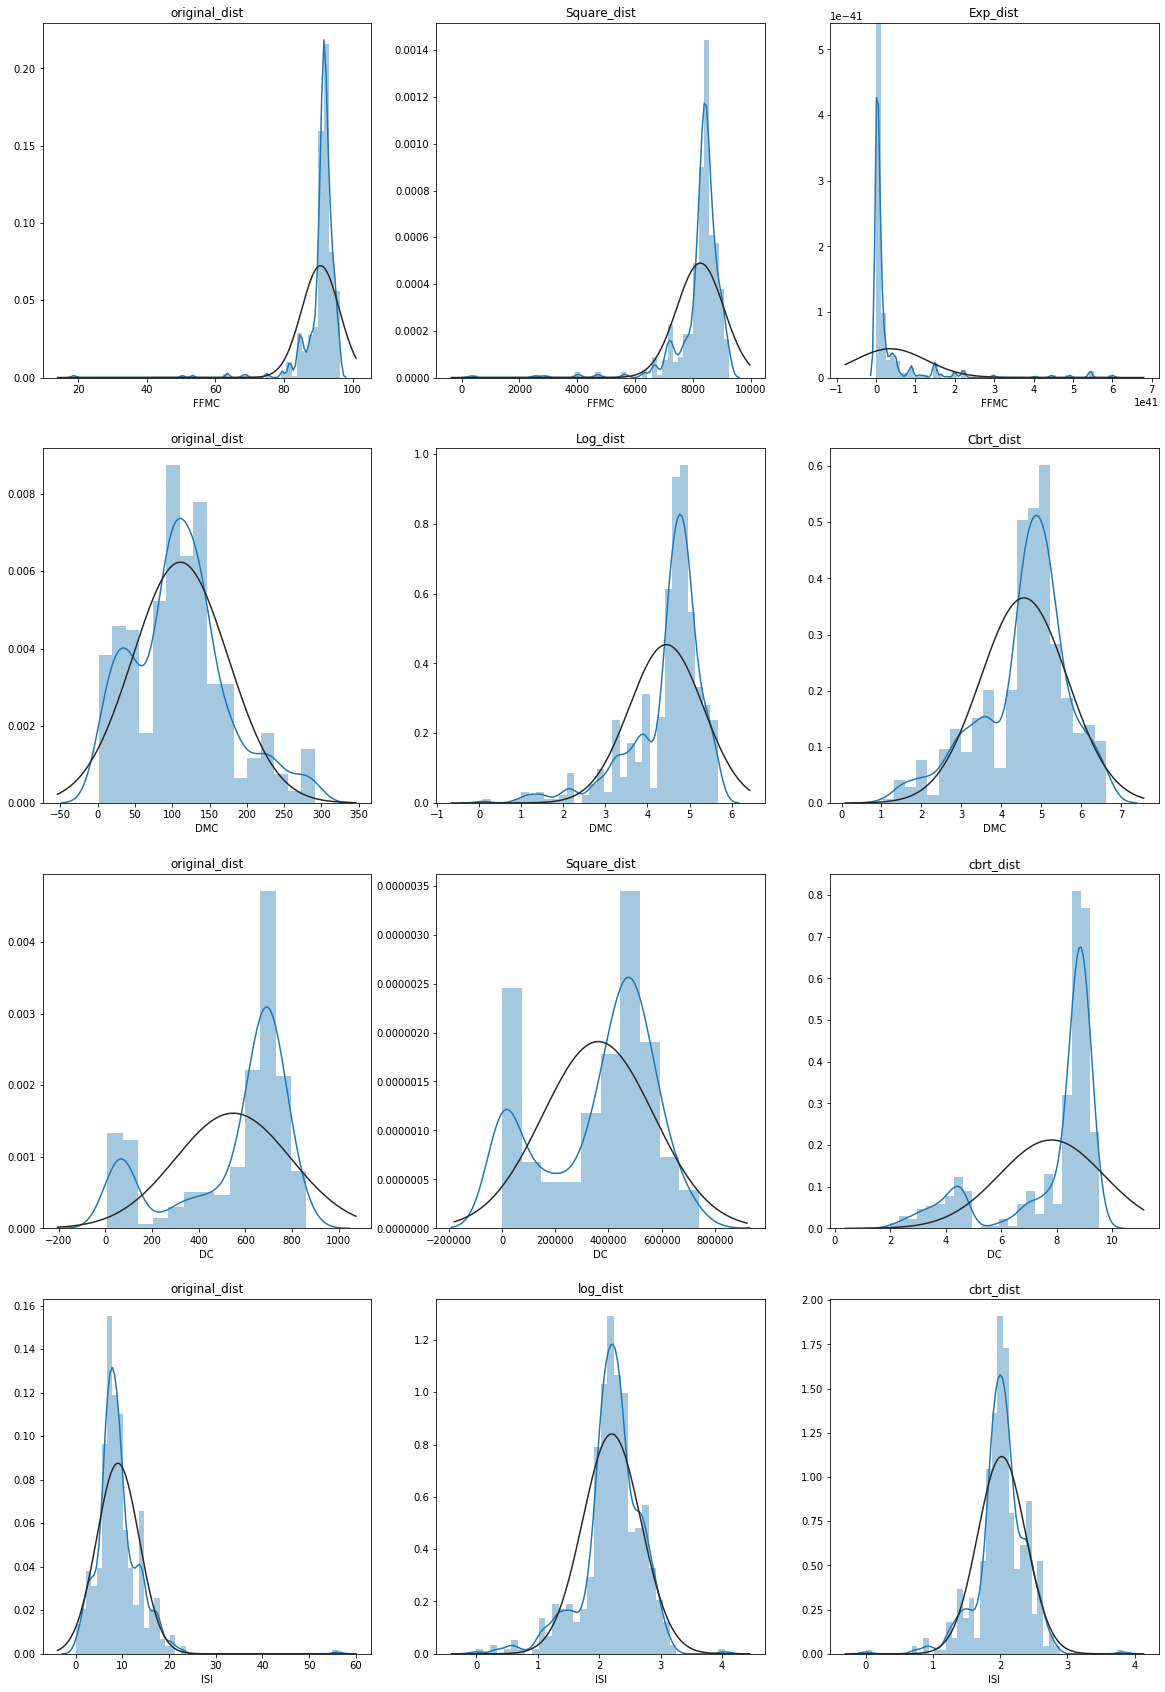

In [ ]:
## Checking which transformation is best by plotting and comparing the distributions
## Creating subplots with 4 rows and 3 columns
## We have already seen the distributions of these indices above based on those we will apply transformations

fig,axes=plt.subplots(4,3,figsize=(20,30))


## Plotting the original distributons of FFMC index
sns.distplot(data['FFMC'],fit=norm,ax=axes[0][0]) 
axes[0][0].set_title('original_dist')

## As FFMC having left skewness we are apllying Square,exponential Transformations and 
##Plotting the Square,exp distributons of FFMC index

sns.distplot(np.square(data['FFMC']),fit=norm,ax=axes[0][1]) 
axes[0][1].set_title('Square_dist')

sns.distplot(np.exp(data['FFMC']),fit=norm,ax=axes[0][2]) 
axes[0][2].set_title('Exp_dist')


## Plotting the original distributons of DMC index
sns.distplot(data['DMC'],fit=norm,ax=axes[1][0]) 
axes[1][0].set_title('original_dist')

## As DMC having Right skewness we are apllying Log,Cbrt Transformations and 
##Plotting the Log,Cbrt distributons of DMC index

sns.distplot(np.log(data['DMC']),fit=norm,ax=axes[1][1]) 
axes[1][1].set_title('Log_dist')

sns.distplot(np.cbrt(data['DMC']),fit=norm,ax=axes[1][2]) 
axes[1][2].set_title('Cbrt_dist')


## Plotting the original distributons of DC index
sns.distplot(data['DC'],fit=norm,ax=axes[2][0]) 
axes[2][0].set_title('original_dist')

## As DC having Light Left skewness we are we are apllying Square,cbrt Transformations
##Plotting the  distributon of Square,cbrtTransformations

sns.distplot(np.square(data['DC']),fit=norm,ax=axes[2][1]) 
axes[2][1].set_title('Square_dist')


sns.distplot(np.cbrt(data['DC']),fit=norm,ax=axes[2][2]) 
axes[2][2].set_title('cbrt_dist')

             

## Plotting the original distributons of ISI index
sns.distplot(data['ISI'],fit=norm,ax=axes[3][0]) 
axes[3][0].set_title('original_dist')

## As ISI having Right skewness we are we are apllying Log,Cbrt Transformations 
##Plotting the  distributon of Log,Cbrt Transformations and  Transformations

sns.distplot(np.log(data['ISI']+1),fit=norm,ax=axes[3][1]) 
axes[3][1].set_title('log_dist')


sns.distplot(np.cbrt(data['ISI']),fit=norm,ax=axes[3][2]) 
axes[3][2].set_title('cbrt_dist')

There is nothing much difference from the original distributions.We will keep original FWI indices as it is

We transformed area,RH,wind features among all the features and they are having better linearity.We kept all the other features as it is


Now let's add some new features based on the existing values

# Creating New features

In [ ]:
#### Creating new feature X_Y we have already created X_Y as list above

data['X_Y']=X_Y

In [ ]:
#### Creating new feature M_D we have already created M_D as list above

data['M_D']=M_D

In [ ]:
### We have already seen in above plots the contribution of temp,rh and wind 
## Here we are creating the new feature combinig the three of them in the following manner

## TRW=0.55*temp+0.3*RH+0.15*wind

data['TRW']=data['temp']*0.4+0.4*data['RH']+0.2*data['wind']

In [ ]:
### FFMC is the fuel moisture code we can derive moisture content of litter from this and can add as a new feature
## This feature explains the moisture content of litter which is the initial layer of ground upto a depth of 5cm
## This equation is from https://www.youtube.com/watch?v=LqqcngYc4Ks&ab_channel=NorthwestKnowledgeHub

## MC=147.2(101-FFMC)/(59.5+FFMC)

data['FFMC_MC']=(147.2*(101-data['FFMC']))/(59.5+data['FFMC'])

In [ ]:
### DMC is the Duff moisture code we can derive moisture content  from this and can add as a new feature
## This feature explains the moisture content of duff layer which is the beneath the litter upto a depth of 5cm to 10cm
## This equation is from https://www.youtube.com/watch?v=qsWSbNOoh8I&ab_channel=NorthwestKnowledgeHub
## MC=exp[(DMC-244.7)/-43.4]+20

data['DMC_MC']=np.exp((data['DMC']-244.7)/(-43.4))+20

In [ ]:
### BUI is the fire behaviour index
## BUI is the combination of DMC and DC dominated by DMC we don't the weightages exactly
## As Bui dominated by DMC giving more weightage to DMC 
## let BUI=0.85*DMC+0.15*DC

data['BUI']=0.85*data['DMC']+0.15*data['DC']

### FWI is the combination of ISI and BUI we don't the weightages exactly
## Let sum them up simply with  0.6 and 0.4 weights 

data['FWI']=0.6*data['ISI']+0.4*data['BUI']

In [ ]:
## Distinguishing the fire intensity based on the FFMC value
### These distinguished values are from https://www.youtube.com/watch?v=Uy_1V20j_L8&ab_channel=NorthwestKnowledgeHub
### Depending up on the FFMC code we can distinguish the fire intensity into low,moderate,high,very high and extreme categories
### 0-80 Low, Let 1
### 81-87 moderate, Let 2
### 88-90 High, Let 3
### 91-92 Very High, Let 4
### 93+   Extreme, Let 5

data.loc[(data.FFMC.round()>=0) & (data.FFMC.round()<=80),'FFMC_intensity']=1
data.loc[(data.FFMC.round()>=81) & (data.FFMC.round()<=87),'FFMC_intensity']=2
data.loc[(data.FFMC.round()>=88) & (data.FFMC.round()<=90),'FFMC_intensity']=3
data.loc[(data.FFMC.round()>=91) & (data.FFMC.round()<=92),'FFMC_intensity']=4
data.loc[(data.FFMC.round()>=93) ,'FFMC_intensity']=5

In [ ]:
## Distinguishing the fire intensity based on the DMC value
### These distinguished values are from https://www.youtube.com/watch?v=Uy_1V20j_L8&ab_channel=NorthwestKnowledgeHub
### Depending up on the DMC code we can distinguish the fire intensity into low,moderate,high,very high and extreme categories
### 0-12 Low, Let 1
### 13-27 moderate, Let 2
### 28-41 High, Let 3
### 42-62 Very High, Let 4
### 63+   Extreme, Let 5

data.loc[(data.DMC.round()>=0) & (data.DMC.round()<=12),'DMC_intensity']=1
data.loc[(data.DMC.round()>=13) & (data.DMC.round()<=27),'DMC_intensity']=2
data.loc[(data.DMC.round()>=28) & (data.DMC.round()<=41),'DMC_intensity']=3
data.loc[(data.DMC.round()>=42) & (data.DMC.round()<=62),'DMC_intensity']=4
data.loc[(data.DMC.round()>=63) ,'DMC_intensity']=5

In [ ]:
## Distinguishing the fire intensity based on the DC value
### These distinguished values are from https://www.youtube.com/watch?v=Uy_1V20j_L8&ab_channel=NorthwestKnowledgeHub
### Depending up on the DC code we can distinguish the fire intensity into low,moderate,high,very high and extreme categories
### 0-79 Low, Let 1
### 80-209 moderate, Let 2
### 210-274 High, Let 3
### 275-359 Very High, Let 4
### 360+   Extreme, Let 5

data.loc[(data.DC.round()>=0) & (data.DC.round()<=79),'DC_intensity']=1
data.loc[(data.DC.round()>=80) & (data.DC.round()<=209),'DC_intensity']=2
data.loc[(data.DC.round()>=210) & (data.DC.round()<=274),'DC_intensity']=3
data.loc[(data.DC.round()>=275) & (data.DC.round()<=359),'DC_intensity']=4
data.loc[(data.DC.round()>=360) ,'DC_intensity']=5

In [ ]:
## Distinguishing the fire intensity based on the ISI value
### These distinguished values are from https://www.youtube.com/watch?v=Uy_1V20j_L8&ab_channel=NorthwestKnowledgeHub
### Depending up on the ISI values we can distinguish the fire intensity into low,moderate,high,very high and extreme categories
### 0-1.9 Low, Let 1
### 2-4.9 moderate, Let 2
### 5-7.9 High, Let 3
### 8.0-10.9 Very High, Let 4
### 11+   Extreme, Let 5


data.loc[(data['ISI'].round()>=0) & (data['ISI'].round()<=1.9),'ISI_intensity']=1
data.loc[(data['ISI'].round()>=1.9) & (data['ISI'].round()<=4.9),'ISI_intensity']=2
data.loc[(data['ISI'].round()>=5.0) & (data['ISI'].round()<=7.9),'ISI_intensity']=3
data.loc[(data['ISI'].round()>=8.0) & (data['ISI'].round()<=10.9),'ISI_intensity']=4
data.loc[(data['ISI'].round()>=11) ,'ISI_intensity']=5



In [ ]:

## Let's add another feature as MC_ratio i.e FFMC_MC/DMC_MC
## MC_ratio is the moisture content ratio
## This is adding as our own feature

data['MC_ratio']=data['FFMC_MC']/data['DMC_MC']



In [ ]:
### Let's sum up all the fuel codes and create new feature called fuelcode FU

data['FU']=data['FFMC']*0.4+0.4*data['DMC']+0.2*data['DC']

### Create another one by adding all the moisture contents MC

data['MC']=data['FFMC_MC']*0.7+0.3*data['DMC_MC']

print(data.shape)
data.head()

(517, 30)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,DMC_MC,BUI,FWI,FFMC_intensity,DMC_intensity,DC_intensity,ISI_intensity,MC_ratio,FU,MC
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,173.632319,36.415,17.626,2.0,2.0,2.0,3.0,0.086115,63.82,62.556353
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,...,144.285414,130.455,56.202,4.0,3.0,5.0,3.0,0.070687,184.22,50.424971
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,...,122.651156,140.180,60.092,4.0,4.0,5.0,3.0,0.083155,191.10,43.934694
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,150.447095,39.930,21.372,4.0,3.0,1.0,4.0,0.060180,65.50,51.471906
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,106.161307,58.935,29.334,3.0,4.0,2.0,4.0,0.109025,76.68,39.950327


We added total 14 features now let's analyse their distributions and relation with the area feature 

Let's first check the correlation of these features

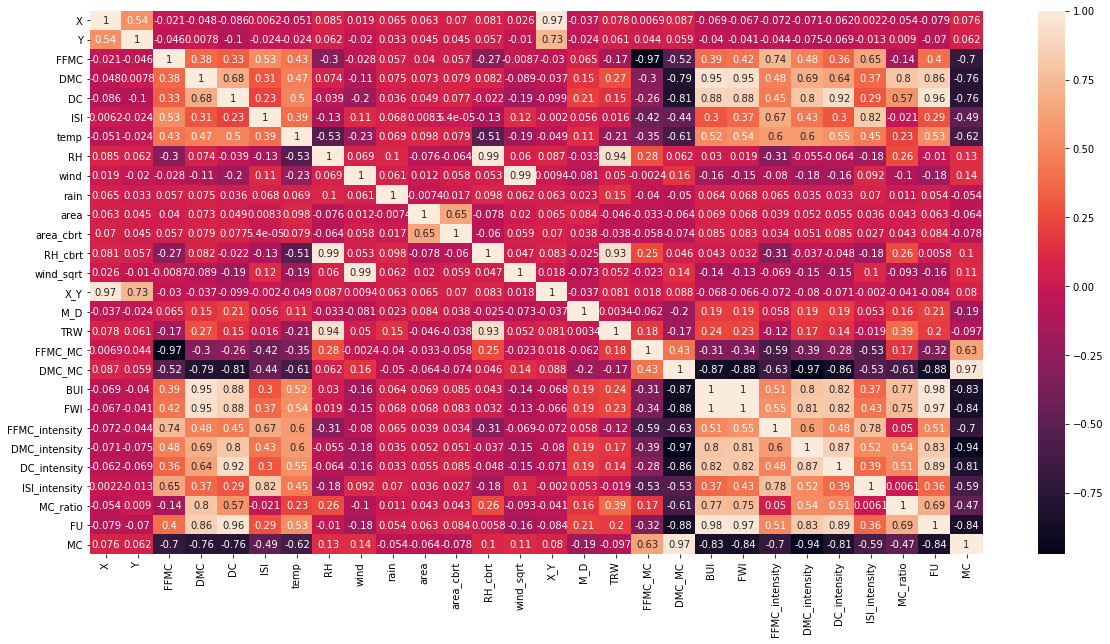

In [ ]:
### Correlation of the  features 

corr = data.corr()
sns.heatmap(corr,annot=True)

BUI,FWI,FU,DC_intensity and DMC_intensity has the highest positive correlation with the area As these are the fire behaviour indices.

FFMC_MC,DMC_MC,MC has highest negative correlation with fire areas.We can interpret it as, As moisture content has negative effect on fire area i.e If MC raises fire spread decrases.

We can remove the ISI,since it's having very less correlation with area

The BUI,FWI and FU are highly correlated and we can keep BUI and remove FWI,FU

MC and DMC_MC are higly related,we can delete MC




In [ ]:
print(corr["area_cbrt"].sort_values(ascending=False))

area_cbrt         1.000000
area              0.645930
BUI               0.084785
DC_intensity      0.084707
FU                0.084435
FWI               0.082552
temp              0.079305
DMC               0.078905
DC                0.076716
X_Y               0.070266
X                 0.070197
wind_sqrt         0.059054
wind              0.057859
FFMC              0.057257
DMC_intensity     0.050774
Y                 0.045406
MC_ratio          0.043133
M_D               0.038060
FFMC_intensity    0.033511
ISI_intensity     0.027158
rain              0.016706
ISI               0.000054
TRW              -0.037683
FFMC_MC          -0.057742
RH_cbrt          -0.060131
RH               -0.064098
DMC_MC           -0.073696
MC               -0.078477
Name: area_cbrt, dtype: float64


Let's see the scatter plots of these features

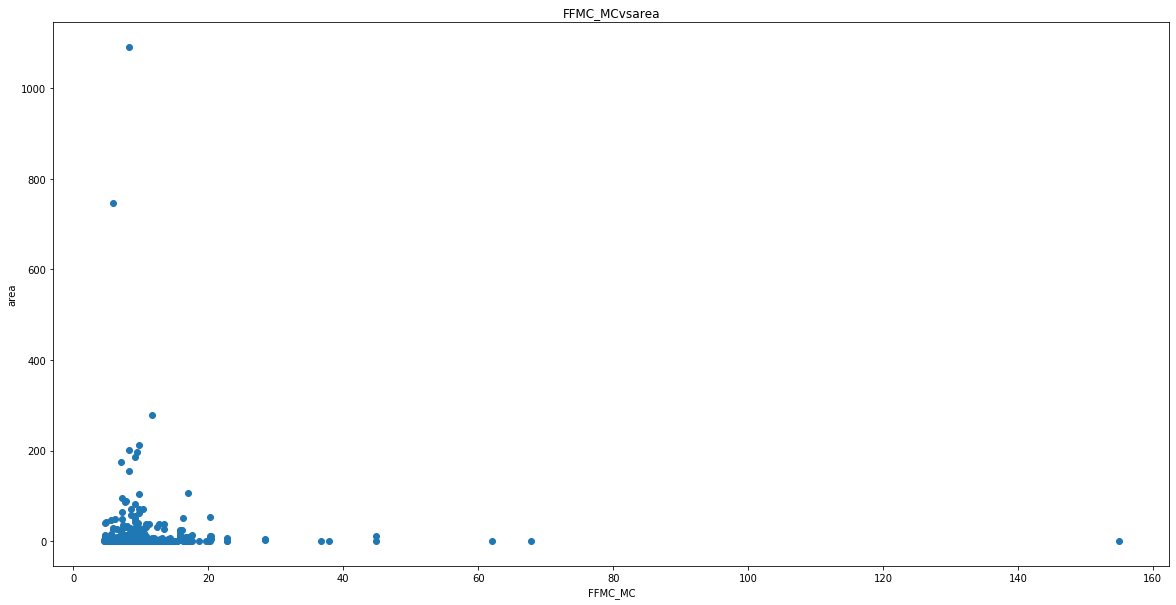

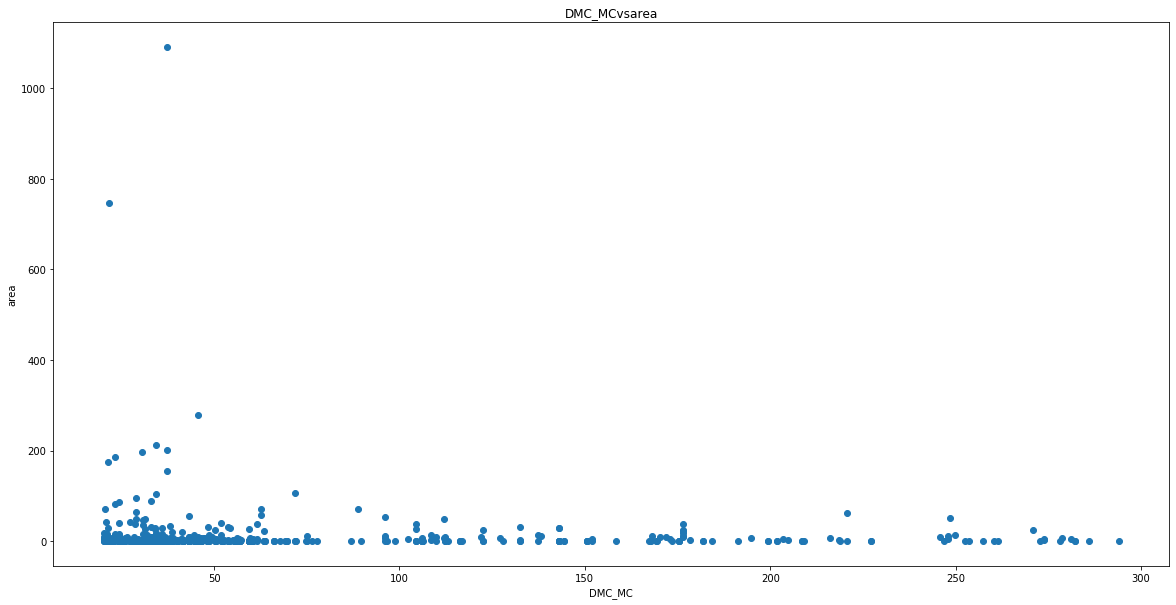

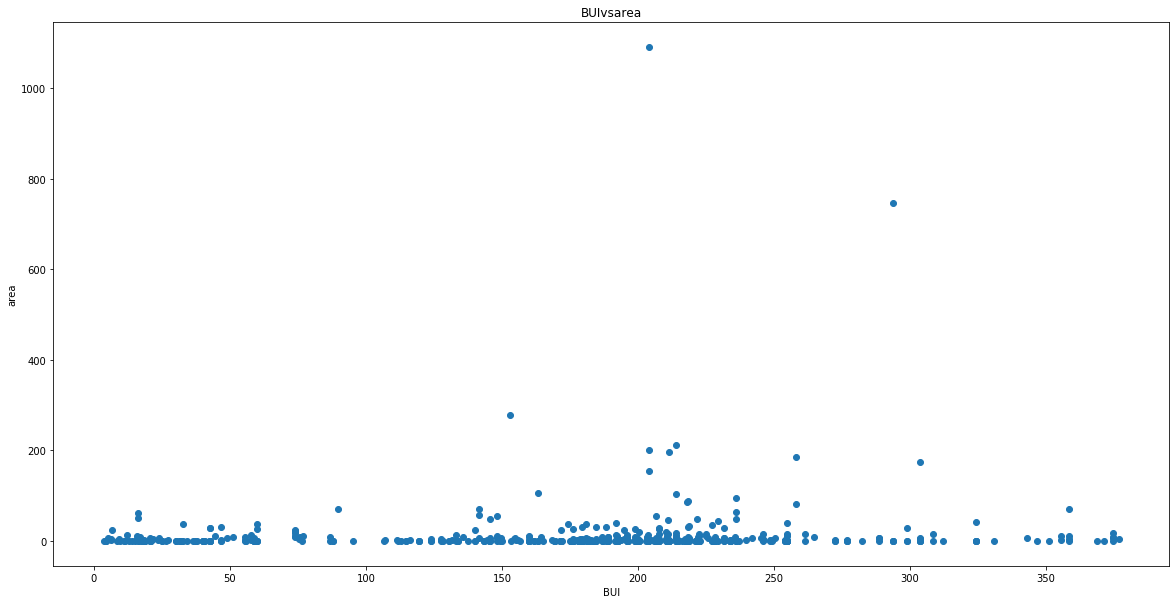

In [ ]:
### Scatter plots of new features
col=['FFMC_MC','DMC_MC','BUI']
for i in range(len(col)):
    plt.scatter(data[col[i]],data['area'])
    plt.xlabel(col[i])
    plt.ylabel('area')
    plt.title(col[i] + 'vs' + 'area')
    plt.show()

Most number of fires happened when the moisture content of litter(FFMC_MC) less than 20,it's clear that the moisture content of litter influenced the fire spreading.Same for DMC_MC. These two are positively skewed.

As the BUI is behaviour index as this value increaing the fire area also increaing,it have some linearity with area. These two features almost normally distributed

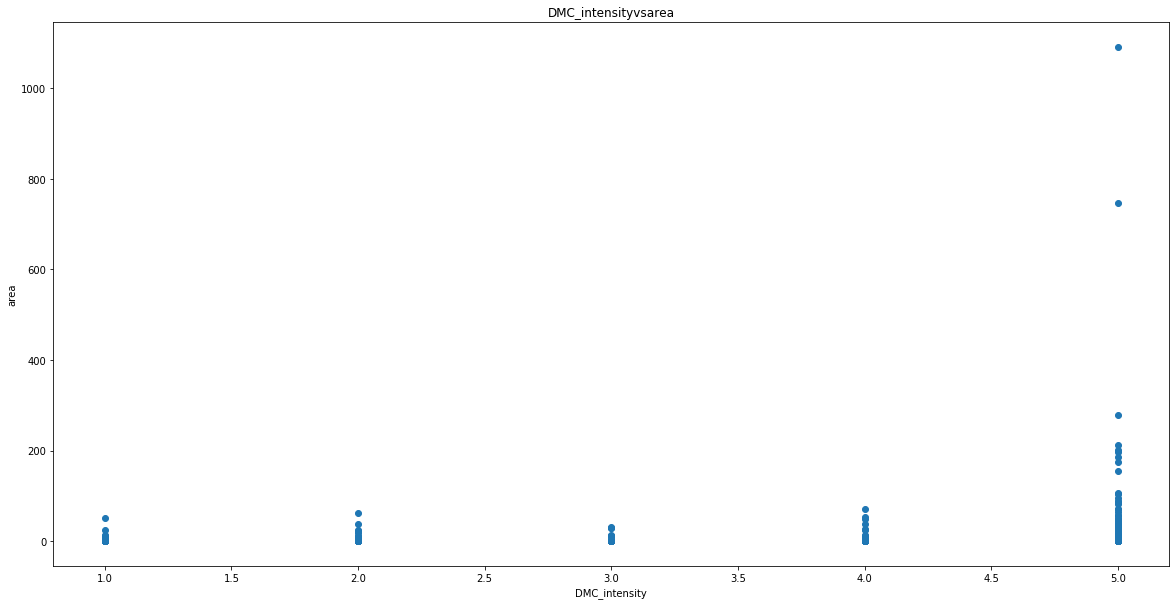

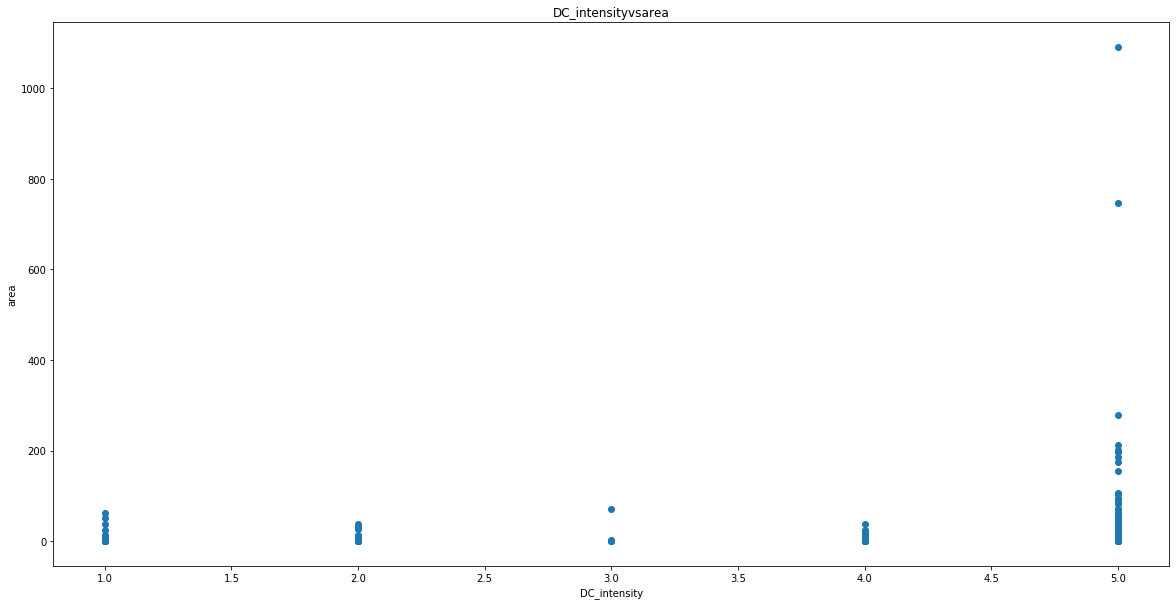

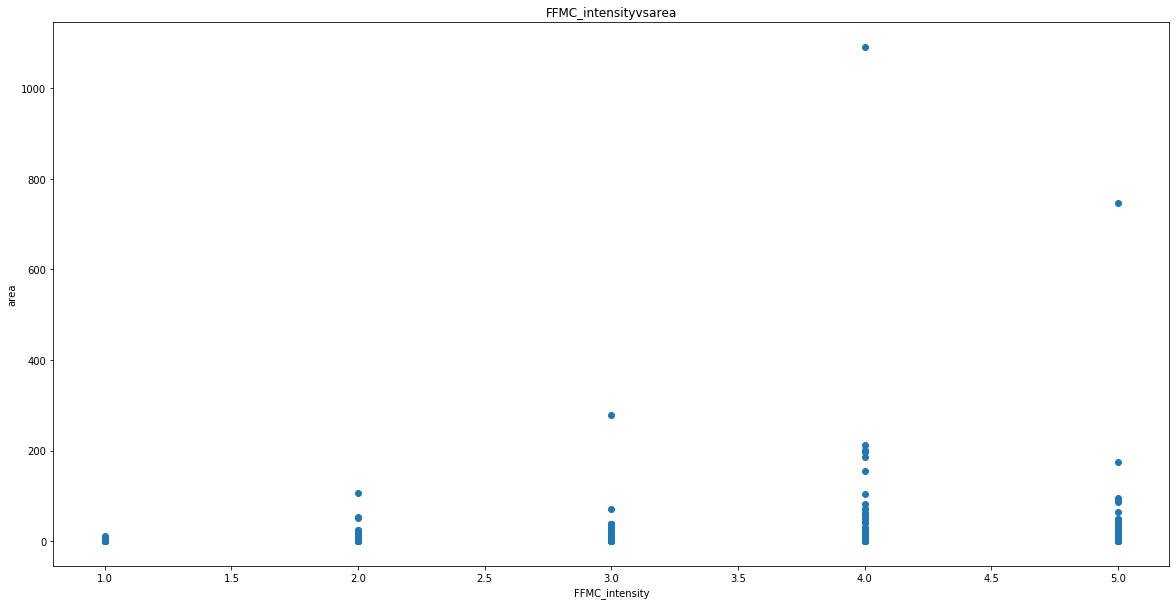

In [ ]:
### Scatter plots of new features
col=['DMC_intensity','DC_intensity','FFMC_intensity']
for i in range(len(col)):
    plt.scatter(data[col[i]],data['area'])
    plt.xlabel(col[i])
    plt.ylabel('area')
    plt.title(col[i] + 'vs' + 'area')
    plt.show()

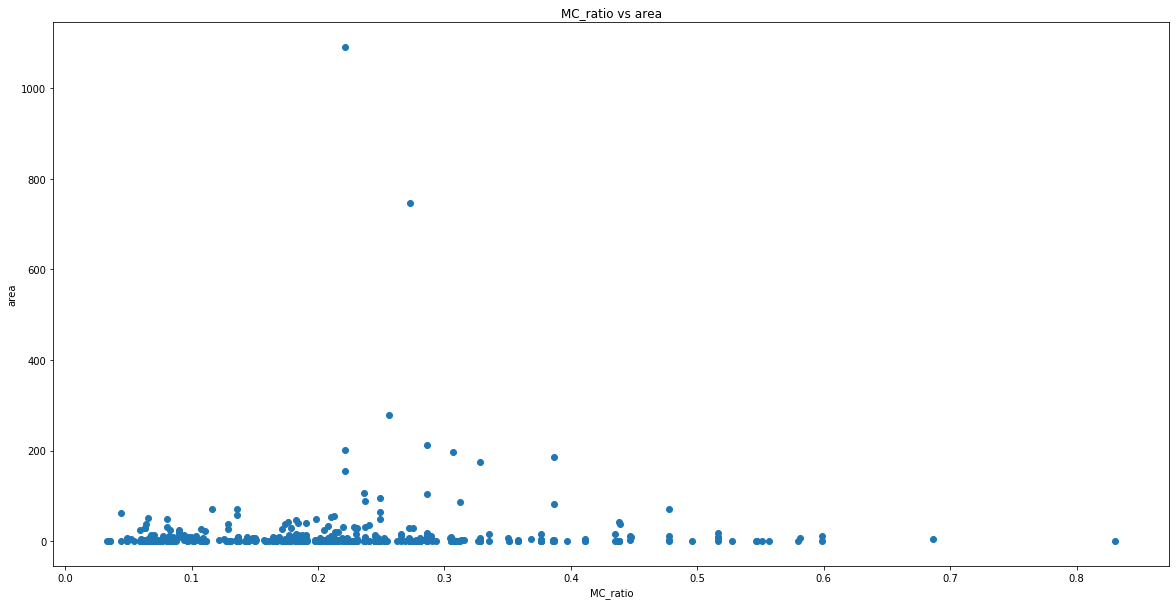

In [ ]:
### Scatter plot of MC_ratio vs area_cbrt

plt.scatter(data['MC_ratio'],data['area'])
plt.xlabel('MC_ratio')
plt.ylabel('area')
plt.title('MC_ratio vs area')
plt.show()

More number of fires taken place at extreme intensity in cases of all three moisture codes, More fire spreading also at extreme conditions of moisture codes.These intensity featrues will be useful for predicting fire area.

Moisture content ratio also looks like having linearity with area.It's distribution is right skewed

Transformations of new features

Text(0.5, 1.0, 'cbrt_dist')

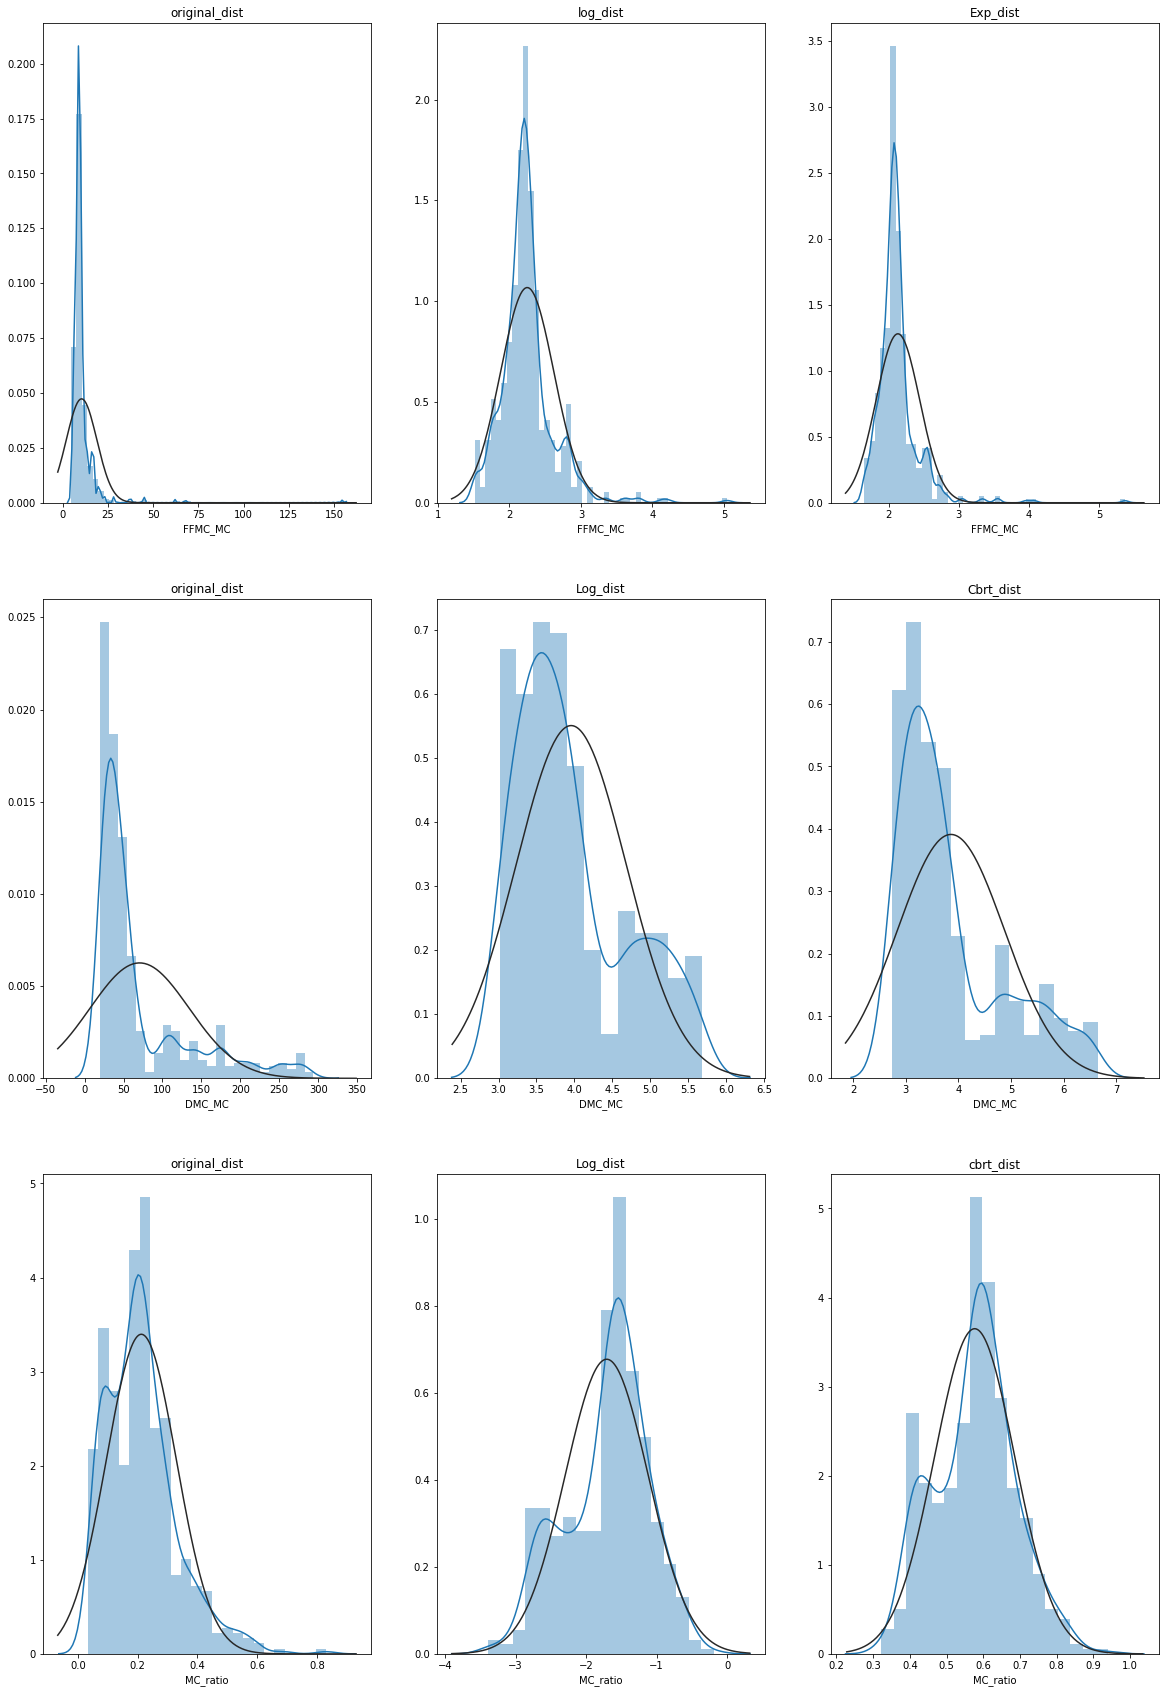

In [ ]:
## Checking which transformation is best by plotting and comparing the distributions
## Creating subplots with 3 rows and 3 columns


fig,axes=plt.subplots(3,3,figsize=(20,30))


## Plotting the original distributons of FFMC_MC index
sns.distplot(data['FFMC_MC'],fit=norm,ax=axes[0][0]) 
axes[0][0].set_title('original_dist')

## As FFMC_MC having Right skewness we are apllying log,cbrt Transformations and 
##Plotting the log,cbrt distributons of FFMC_MC index

sns.distplot(np.log(data['FFMC_MC']),fit=norm,ax=axes[0][1]) 
axes[0][1].set_title('log_dist')

sns.distplot(np.cbrt(data['FFMC_MC']),fit=norm,ax=axes[0][2]) 
axes[0][2].set_title('Exp_dist')


## Plotting the original distributons of DMC_MC index
sns.distplot(data['DMC_MC'],fit=norm,ax=axes[1][0]) 
axes[1][0].set_title('original_dist')

## As DM_MC having Right skewness we are apllying Log,Cbrt Transformations and 
##Plotting the Log,Cbrt distributons of DMC_MC index

sns.distplot(np.log(data['DMC_MC']),fit=norm,ax=axes[1][1]) 
axes[1][1].set_title('Log_dist')

sns.distplot(np.cbrt(data['DMC_MC']),fit=norm,ax=axes[1][2]) 
axes[1][2].set_title('Cbrt_dist')


## Plotting the original distributons of MC_ratioindex
sns.distplot(data['MC_ratio'],fit=norm,ax=axes[2][0]) 
axes[2][0].set_title('original_dist')

## As_ratio having Right skewness we are we are apllying log,cbrt Transformations
##Plotting the  distributon of log,cbrtTransformations

sns.distplot(np.log(data['MC_ratio']),fit=norm,ax=axes[2][1]) 
axes[2][1].set_title('Log_dist')


sns.distplot(np.cbrt(data['MC_ratio']),fit=norm,ax=axes[2][2]) 
axes[2][2].set_title('cbrt_dist')

             


we are having the better results with log transformations for all the three features

In [ ]:
## transforming the features
data['log_FFMC_MC']=np.log(data['FFMC_MC'])
data['log_DMC_MC']=np.log(data['DMC_MC'])
data['log_MC_ratio']=np.log(data['MC_ratio'])

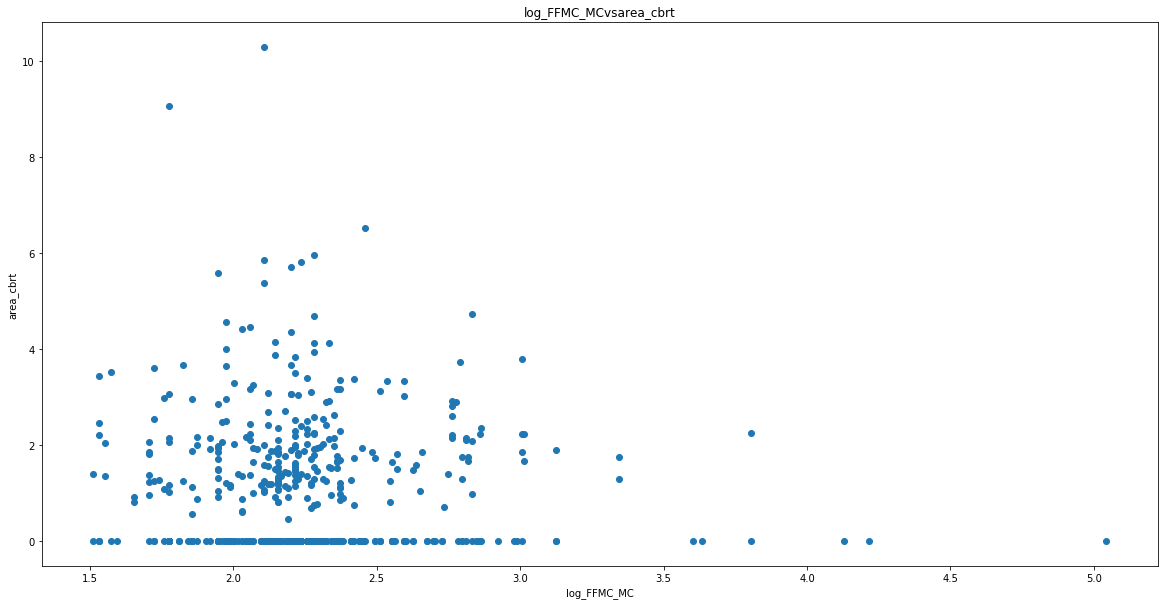

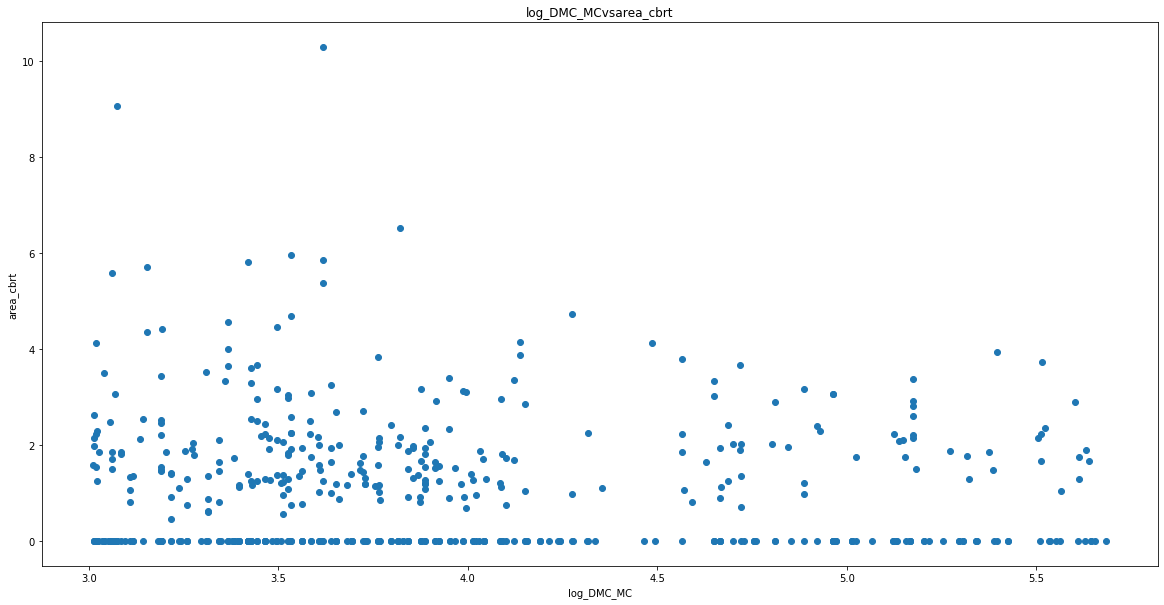

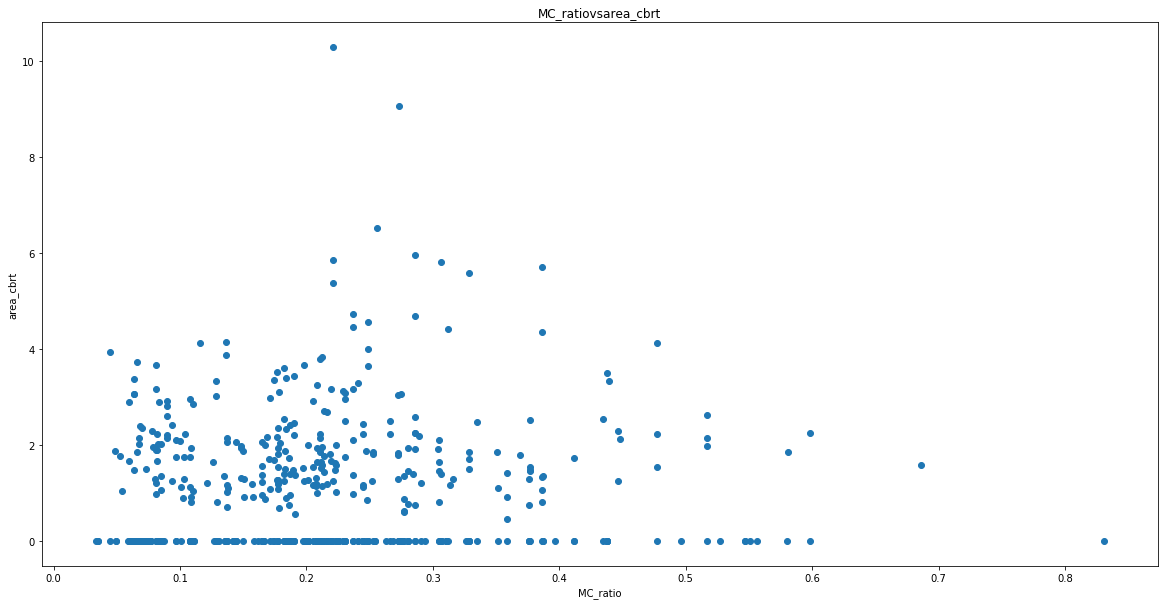

In [ ]:
## Checking the scatter plots after transformations

col=['log_FFMC_MC','log_DMC_MC','MC_ratio']
for i in range(len(col)):
    plt.scatter(data[col[i]],data['area_cbrt'])
    plt.xlabel(col[i])
    plt.ylabel('area_cbrt')
    plt.title(col[i] + 'vs' + 'area_cbrt')
    plt.show()

We are having the better distribution and variance of these features after transformation

In [ ]:
### Deleting the original columns in data 
col=['RH','wind','area','FFMC_MC','DMC_MC','MC_ratio','ISI','FWI','FU','MC','X','Y']
data_final=data.drop(col,axis=1)
print(data_final.shape)
print(data_final.head())
print(data_final.isna().sum())

(517, 21)
  month  day  FFMC   DMC     DC  temp  rain  area_cbrt  RH_cbrt  wind_sqrt  \
0   mar  fri  86.2  26.2   94.3   8.2   0.0        0.0     3.71       2.59   
1   oct  tue  90.6  35.4  669.1  18.0   0.0        0.0     3.21       0.95   
2   oct  sat  90.6  43.7  686.9  14.6   0.0        0.0     3.21       1.14   
3   mar  fri  91.7  33.3   77.5   8.3   0.2        0.0     4.59       2.00   
4   mar  sun  89.3  51.3  102.2  11.4   0.0        0.0     4.63       1.34   

   ...       M_D    TRW      BUI  FFMC_intensity  DMC_intensity  DC_intensity  \
0  ...  0.108305  25.02   36.415             2.0            2.0           2.0   
1  ...  0.506084  20.58  130.455             4.0            3.0           5.0   
2  ...  0.758506  19.30  140.180             4.0            4.0           5.0   
3  ... -0.396591  42.92   39.930             4.0            3.0           1.0   
4  ... -0.360367  44.52   58.935             3.0            4.0           2.0   

   ISI_intensity  log_FFMC_MC  log

In [7]:
#### Mean encoding the month and day featurs
mean_month=data_final.groupby('month')['area_cbrt'].mean().round(3).to_dict()
mean_day=data_final.groupby('day')['area_cbrt'].mean().round(3).to_dict()

data_final['month']=data_final['month'].map(mean_month)
data_final['day']=data_final['day'].map(mean_day)

In [12]:
##### Saving this dictioary  for later use
pickle.dump(mean_month,open('mean_month_area_cbrt','wb'))
pickle.dump(mean_day,open('mean_day_area_cbrt','wb'))

In [8]:
print(mean_month,mean_day)

{'apr': 1.035, 'aug': 1.067, 'dec': 2.316, 'feb': 1.031, 'jan': 0.0, 'jul': 1.13, 'jun': 0.857, 'mar': 0.731, 'may': 1.688, 'nov': 0.0, 'oct': 0.841, 'sep': 1.273} {'fri': 0.949, 'mon': 1.076, 'sat': 1.248, 'sun': 1.093, 'thu': 1.041, 'tue': 1.22, 'wed': 1.143}


In [ ]:
data_final.head()

,month,day,FFMC,DMC,DC,temp,rain,area_cbrt,RH_cbrt,wind_sqrt,...,M_D,TRW,BUI,FFMC_intensity,DMC_intensity,DC_intensity,ISI_intensity,log_FFMC_MC,log_DMC_MC,log_MC_ratio
0,0.731,0.949,86.2,26.2,94.3,8.2,0.0,0.0,3.71,2.59,...,0.108305,25.02,36.415,2.0,2.0,2.0,3.0,2.704870,5.156940,-2.452070
1,0.841,1.220,90.6,35.4,669.1,18.0,0.0,0.0,3.21,0.95,...,0.506084,20.58,130.455,4.0,3.0,5.0,3.0,2.322296,4.971793,-2.649497
2,0.841,1.248,90.6,43.7,686.9,14.6,0.0,0.0,3.21,1.14,...,0.758506,19.30,140.180,4.0,4.0,5.0,3.0,2.322296,4.809344,-2.487048
3,0.731,0.949,91.7,33.3,77.5,8.3,0.2,0.0,4.59,2.00,...,-0.396591,42.92,39.930,4.0,3.0,1.0,4.0,2.203203,5.013611,-2.810408
4,0.731,1.093,89.3,51.3,102.2,11.4,0.0,0.0,4.63,1.34,...,-0.360367,44.52,58.935,3.0,4.0,2.0,4.0,2.448778,4.664960,-2.216182


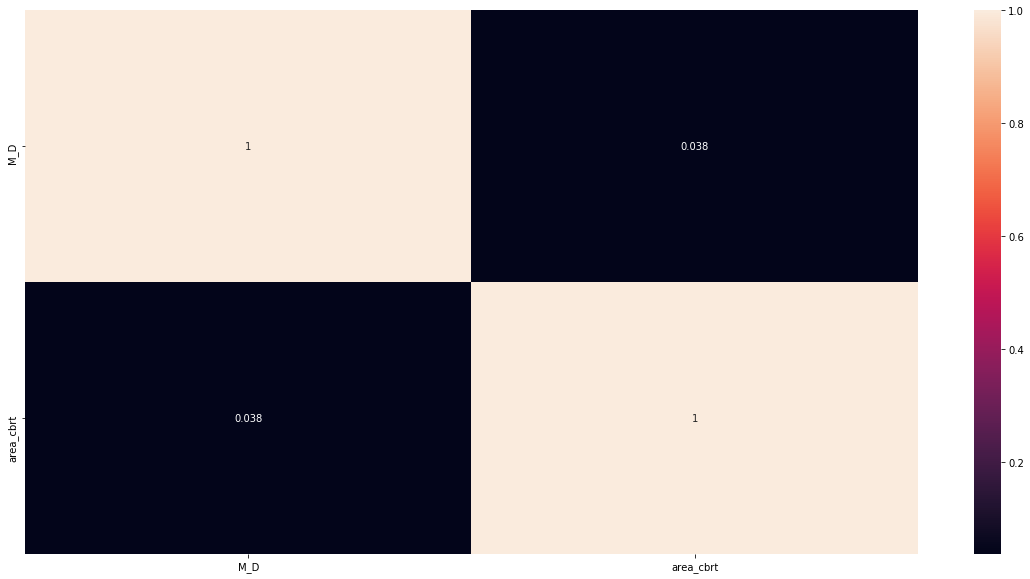

In [ ]:
## Checking the correlation of month and day with M_D,area_cbrt
col=['month','day','M_D','area_cbrt']
corr=data[col].corr()
sns.heatmap(corr,annot=True)

month and day are having very less correlation with the new feature M_D, we can keep the three features

In [ ]:
print(data_final.shape)
data_final.columns

(517, 21)


Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'temp', 'rain', 'area_cbrt',
       'RH_cbrt', 'wind_sqrt', 'X_Y', 'M_D', 'TRW', 'BUI', 'FFMC_intensity',
       'DMC_intensity', 'DC_intensity', 'ISI_intensity', 'log_FFMC_MC',
       'log_DMC_MC', 'log_MC_ratio'],
      dtype='object')

In [ ]:
data_final.to_csv('data_final')

# Data With All the transformed columns

# Preparing data

In [380]:
data=pd.read_csv('data_final')

In [381]:
data.head()

,Unnamed: 0,month,day,FFMC,DMC,DC,temp,rain,area_cbrt,RH_cbrt,...,M_D,TRW,BUI,FFMC_intensity,DMC_intensity,DC_intensity,ISI_intensity,log_FFMC_MC,log_DMC_MC,log_MC_ratio
0,0,0.731,0.949,86.2,26.2,94.3,8.2,0.0,0.0,3.71,...,0.108305,25.02,36.415,2.0,2.0,2.0,3.0,2.704870,5.156940,-2.452070
1,1,0.841,1.220,90.6,35.4,669.1,18.0,0.0,0.0,3.21,...,0.506084,20.58,130.455,4.0,3.0,5.0,3.0,2.322296,4.971793,-2.649497
2,2,0.841,1.248,90.6,43.7,686.9,14.6,0.0,0.0,3.21,...,0.758506,19.30,140.180,4.0,4.0,5.0,3.0,2.322296,4.809344,-2.487048
3,3,0.731,0.949,91.7,33.3,77.5,8.3,0.2,0.0,4.59,...,-0.396591,42.92,39.930,4.0,3.0,1.0,4.0,2.203203,5.013611,-2.810408
4,4,0.731,1.093,89.3,51.3,102.2,11.4,0.0,0.0,4.63,...,-0.360367,44.52,58.935,3.0,4.0,2.0,4.0,2.448778,4.664960,-2.216182


In [382]:
print(data.shape)
data.describe()

(517, 22)


,Unnamed: 0,month,day,FFMC,DMC,DC,temp,rain,area_cbrt,RH_cbrt,...,M_D,TRW,BUI,FFMC_intensity,DMC_intensity,DC_intensity,ISI_intensity,log_FFMC_MC,log_DMC_MC,log_MC_ratio
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,258.000000,1.106880,1.106884,90.644681,110.872340,547.940039,18.889168,0.021663,1.106882,3.486905,...,0.609769,26.074468,176.432495,3.851064,4.427466,4.323017,3.769826,2.248080,3.956904,-1.708824
std,149.389312,0.250882,0.098777,5.520111,64.046482,248.066192,5.806625,0.295959,1.399649,0.421445,...,0.918811,5.664002,84.333012,1.011113,1.136541,1.366158,1.011187,0.374060,0.725635,0.588900
min,0.000000,0.000000,0.949000,18.700000,1.100000,7.900000,2.200000,0.000000,0.000000,2.470000,...,-2.056548,11.940000,3.735000,1.000000,1.000000,1.000000,1.000000,1.512477,3.012674,-3.398299
25%,129.000000,1.067000,1.041000,90.200000,68.600000,437.700000,15.500000,0.000000,0.000000,3.210000,...,0.021068,22.600000,137.665000,3.000000,5.000000,5.000000,3.000000,2.057148,3.419716,-2.053884
50%,258.000000,1.067000,1.093000,91.600000,108.300000,664.200000,19.300000,0.000000,0.804145,3.480000,...,0.583912,25.120000,192.680000,4.000000,5.000000,5.000000,4.000000,2.214560,3.765145,-1.601870
75%,387.000000,1.273000,1.220000,92.900000,142.400000,713.900000,22.800000,0.000000,1.872931,3.760000,...,1.218838,29.000000,222.155000,5.000000,5.000000,5.000000,5.000000,2.362705,4.354598,-1.298563
max,516.000000,2.316000,1.248000,96.200000,291.300000,860.600000,33.300000,6.400000,10.294068,4.640000,...,3.952927,44.520000,376.695000,5.000000,5.000000,5.000000,5.000000,5.042894,5.683370,-0.185680


In [383]:
#### Standardizing the numerical values
def standardize(column):
    scalar=StandardScaler()
    column=scalar.fit_transform(column.reshape(-1,1))
    
    return column,scalar
    

In [384]:
### Standardizing the data

columns=list(data.columns)
columns.remove('area_cbrt')

scalers_transform={}
for i in (columns):
    
    data[i],scaler=standardize(data[i].values)
    scalers_transform[i]=scaler
    
##### Saving these scalers for later use
pickle.dump(scalers_transform,open('scalers_transform','wb'))

In [385]:
scalers_transform

{'Unnamed: 0': StandardScaler(copy=True, with_mean=True, with_std=True),
 'month': StandardScaler(copy=True, with_mean=True, with_std=True),
 'day': StandardScaler(copy=True, with_mean=True, with_std=True),
 'FFMC': StandardScaler(copy=True, with_mean=True, with_std=True),
 'DMC': StandardScaler(copy=True, with_mean=True, with_std=True),
 'DC': StandardScaler(copy=True, with_mean=True, with_std=True),
 'temp': StandardScaler(copy=True, with_mean=True, with_std=True),
 'rain': StandardScaler(copy=True, with_mean=True, with_std=True),
 'RH_cbrt': StandardScaler(copy=True, with_mean=True, with_std=True),
 'wind_sqrt': StandardScaler(copy=True, with_mean=True, with_std=True),
 'X_Y': StandardScaler(copy=True, with_mean=True, with_std=True),
 'M_D': StandardScaler(copy=True, with_mean=True, with_std=True),
 'TRW': StandardScaler(copy=True, with_mean=True, with_std=True),
 'BUI': StandardScaler(copy=True, with_mean=True, with_std=True),
 'FFMC_intensity': StandardScaler(copy=True, with_mean=

In [386]:
data.head()

,Unnamed: 0,month,day,FFMC,DMC,DC,temp,rain,area_cbrt,RH_cbrt,...,M_D,TRW,BUI,FFMC_intensity,DMC_intensity,DC_intensity,ISI_intensity,log_FFMC_MC,log_DMC_MC,log_MC_ratio
0,-1.728704,-1.499688,-1.599931,-0.805959,-1.323326,-1.830477,-1.842640,-0.073268,0.0,0.529869,...,-0.546303,-0.186350,-1.661901,-1.832493,-2.137906,-1.702049,-0.762047,1.222349,1.655375,-1.263315
1,-1.722003,-1.060809,1.146272,-0.008102,-1.179541,0.488891,-0.153278,-0.073268,0.0,-0.657674,...,-0.112956,-0.971008,-0.545718,0.147442,-1.257191,0.496017,-0.762047,0.198600,1.399977,-1.598887
2,-1.715303,-1.060809,1.430012,-0.008102,-1.049822,0.560715,-0.739383,-0.073268,0.0,-0.657674,...,0.162036,-1.197215,-0.430289,0.147442,-0.376476,0.496017,-0.762047,0.198600,1.175888,-1.322768
3,-1.708603,-1.499688,-1.599931,0.191362,-1.212361,-1.898266,-1.825402,0.603155,0.0,2.619945,...,-1.096345,2.977020,-1.620180,0.147442,-1.257191,-2.434737,0.227848,-0.120088,1.457662,-1.872392
4,-1.701902,-1.499688,-0.140694,-0.243833,-0.931043,-1.798600,-1.291012,-0.073268,0.0,2.714949,...,-1.056882,3.259779,-1.394606,-0.842525,-0.376476,-1.702049,0.227848,0.537059,0.976719,-0.862369


In [387]:
del data['Unnamed: 0']

# Random model checking

In [388]:
### Splitting the data into train and test

X=data.drop('area_cbrt',axis=1)
Y=data['area_cbrt'].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15)

In [389]:
data.area_cbrt.describe()

count    517.000000
mean       1.106882
std        1.399649
min        0.000000
25%        0.000000
50%        0.804145
75%        1.872931
max       10.294068
Name: area_cbrt, dtype: float64

In [390]:
### After transformation of data, from data.describe() we can observe the mean area 1.10

## we can calculate the RMSE and MAE for train and test by taking predictions as 1.10

## These scores can interpret as random model scores and our models need to give better results than this

## Assigning cube(1.10) as predictions for comparision with normal data, 

y_pred_train=np.array([(1.10)**3 for i in range(y_train.shape[0])])
y_pred_test=np.array([(1.10)**3 for i in range(y_test.shape[0])])

In [391]:
### Calculating the RMSE scores
### as we did cube root transformation we are doing the cube of prediction and area 

rmse_train_random=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_random=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a random model:', rmse_train_random)
print('RMSE score for test data by a random model:', rmse_test_random)

print('-'*100)

### Calculating MAE scores

mae_train_random=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_random=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a random model:',mae_train_random)
print('MAE score for test data by a random model:',mae_test_random)

RMSE score for train data by a random model: 69.79086950077459
RMSE score for test data by a random model: 11.025730511360646
----------------------------------------------------------------------------------------------------
MAE score for train data by a random model: 14.366546661651482
MAE score for test data by a random model: 5.650453490923076


The random model giving us the RMSE and MAE scores as above and our model needs to give better results than this

# 1. Linear regression

In [392]:
## Linear regression

reg= LinearRegression()
reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores
rmse_train_linear=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_linear=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a Linear regression model:', rmse_train_linear)
print('RMSE score for test data by a Linear regression model:', rmse_test_linear)

print('-'*100)

### Calculating MAE scores

mae_train_linear=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_linear=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a Linear regression model:',mae_train_linear)
print('MAE score for test data by a Linear regression model:',mae_test_linear)

pickle.dump(reg,open('lir_reg','wb'))

RMSE score for train data by a Linear regression model: 69.62522937862907
RMSE score for test data by a Linear regression model: 11.049720911217436
----------------------------------------------------------------------------------------------------
MAE score for train data by a Linear regression model: 13.995642215702453
MAE score for test data by a Linear regression model: 5.265158553845052


# 2.Ridge Regression

In [393]:


reg=Ridge()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=Ridge(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_ridge=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_ridge=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a ridge regression model:', rmse_train_ridge)
print('RMSE score for test data by a ridge regression model:', rmse_test_ridge)

pickle.dump(reg,open('ridge_reg_rmse','wb'))

print('-'*100)

reg=Ridge()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=Ridge(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating MAE scores

mae_train_ridge=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_ridge=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a ridge regression model:',mae_train_ridge)
print('MAE score for test data by a ridge regression model:',mae_test_ridge)

pickle.dump(reg,open('ridge_reg_mae','wb'))

{'alpha': 1000}
RMSE score for train data by a ridge regression model: 69.86021637054947
RMSE score for test data by a ridge regression model: 11.316634344517217
----------------------------------------------------------------------------------------------------
{'alpha': 100}
MAE score for train data by a ridge regression model: 14.013675989918855
MAE score for test data by a ridge regression model: 5.255918762881142


# 3.Lasso regression

In [394]:
### Lasso regression

reg=Lasso()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=Lasso(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_lasso=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_lasso=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a Lasso regression model:', rmse_train_lasso)
print('RMSE score for test data by a Lasso regression model:', rmse_test_lasso)

pickle.dump(reg,open('lasso_reg_rmse','wb'))

print('-'*100)

reg=Lasso()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=Lasso(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating MAE scores

mae_train_lasso=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_lasso=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a Lasso regression model:',mae_train_lasso)
print('MAE score for test data by a Lasso regression model:',mae_test_lasso)

pickle.dump(reg,open('lasso_reg_mae','wb'))

C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.856119855392194, tolerance: 0.07800825978282533
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.239752406221555, tolerance: 0.07586694624287375
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.38305468701179, tolerance: 0.06678418316463439
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

{'alpha': 0.1}
RMSE score for train data by a Lasso regression model: 69.89344479399448
RMSE score for test data by a Lasso regression model: 11.262351002691712
----------------------------------------------------------------------------------------------------
{'alpha': 0.1}
MAE score for train data by a Lasso regression model: 14.084414467449786
MAE score for test data by a Lasso regression model: 5.444006386231017


C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.76801092529519, tolerance: 0.07697072089545354
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9040707053784445, tolerance: 0.06946170931842609
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.20683024293703, tolerance: 0.07800825978282533
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

# 4.Elastic net

In [395]:
### Elastic regression


reg=ElasticNet()
params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=ElasticNet(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_elastic=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_elastic=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a elastic net model:', rmse_train_elastic)
print('RMSE score for test data by a elastic net model:', rmse_test_elastic)

pickle.dump(reg,open('elastic_reg_rmse','wb'))  #### Saving the model

print('-'*100)

reg=ElasticNet()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=ElasticNet(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating MAE scores

mae_train_elastic=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_elastic=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a random model:',mae_train_elastic)
print('MAE score for test data by a random model:',mae_test_elastic)

pickle.dump(reg,open('elastic_reg_mae','wb'))  #### Saving the model

C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.34128905339401, tolerance: 0.07800825978282533
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.122117189442804, tolerance: 0.07586694624287375
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.10407964129436, tolerance: 0.06678418316463439
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

{'alpha': 0.1}
RMSE score for train data by a elastic net model: 69.8157778738101
RMSE score for test data by a elastic net model: 11.171461677927201
----------------------------------------------------------------------------------------------------
{'alpha': 0.1}
MAE score for train data by a random model: 14.046265295466343
MAE score for test data by a random model: 5.358869457647849


C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6094980212002383, tolerance: 0.06946170931842609
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.68150635583959, tolerance: 0.07586694624287375
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.6132467861438045, tolerance: 0.07697072089545354
  positive)
C:\Users\k suresh kumar reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conv

# KNN Regressor

In [396]:
### KNN Regressor

reg=KNeighborsRegressor()
params={'n_neighbors':[3,5,7,10,15,20,25,30,45,50,60,70,80,90,100,150,250,260,270,280,290,300]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')
reg.fit(x_train,y_train)

print(reg.best_params_)


reg=KNeighborsRegressor(n_neighbors=reg.best_params_['n_neighbors'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_knn=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_knn=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a knn regressor model:', rmse_train_knn)
print('RMSE score for test data by a knn regressor model:', rmse_test_knn)

pickle.dump(reg,open('knn_reg_rmse','wb'))  #### Saving the model

print('-'*100)

reg=KNeighborsRegressor()
params={'n_neighbors':[3,5,7,10,15,20,25,30,45,50,60,70,80,90,100,150,250,260,270,280,290,300]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')
reg.fit(x_train,y_train)

print(reg.best_params_)


reg=KNeighborsRegressor(n_neighbors=reg.best_params_['n_neighbors'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the MAE scores

mae_train_knn=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_knn=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a knn regressor model:', mae_train_knn)
print('MAE score for test data by a knn regressor model:', mae_test_knn)

pickle.dump(reg,open('knn_reg_mae','wb'))  #### Saving the model

{'n_neighbors': 150}
RMSE score for train data by a knn regressor model: 69.82923521665764
RMSE score for test data by a knn regressor model: 11.373521659526814
----------------------------------------------------------------------------------------------------
{'n_neighbors': 150}
MAE score for train data by a knn regressor model: 14.166111127543074
MAE score for test data by a knn regressor model: 5.5788847128305


# DT Regressor 

In [397]:
### Decision Tree Regressor

reg=DecisionTreeRegressor(criterion='mse')

params={'max_depth':[3,5,7,10,15,20,25,30]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=DecisionTreeRegressor(criterion='mse',max_depth=reg.best_params_['max_depth'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_dt=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_dt=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a decision tree regressor model:', rmse_train_dt)
print('RMSE score for test data by a decision tree regressor model:', rmse_test_dt)

pickle.dump(reg,open('dt_reg_rmse','wb'))  #### Saving the model

print('-'*100)

reg=DecisionTreeRegressor(criterion='mae')
params={'max_depth':[3,5,7,10,15,20,25,30]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=DecisionTreeRegressor(criterion='mae',max_depth=reg.best_params_['max_depth'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the MAE scores

mae_train_dt=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_dt=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a decision tree regressor model:', mae_train_dt)
print('MAE score for test data by a decision tree regressor model:', mae_test_dt)

pickle.dump(reg,open('dt_reg_mae','wb'))  #### Saving the model

{'max_depth': 3}
RMSE score for train data by a decision tree regressor model: 67.04979001884466
RMSE score for test data by a decision tree regressor model: 13.95959279028687
----------------------------------------------------------------------------------------------------
{'max_depth': 3}
MAE score for train data by a decision tree regressor model: 13.566697038724378
MAE score for test data by a decision tree regressor model: 8.017243446682222


#  Random Forest Regressor

In [398]:
### Random Forest Regressor

reg=RandomForestRegressor(criterion='mse')

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=RandomForestRegressor(criterion='mse',n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_rf=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_rf=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a RandomForest regressor model:', rmse_train_rf)
print('RMSE score for test data by a RandomForest regressor model:', rmse_test_rf)

pickle.dump(reg,open('rf_reg_rmse','wb'))  #### Saving the model

print('-'*100)

reg=RandomForestRegressor(criterion='mae')
params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=RandomForestRegressor(criterion='mae',n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_rf=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_rf=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a RandomForest regressor model:', mae_train_rf)
print('MAE score for test data by a RandomForest regressor model:', mae_test_rf)

pickle.dump(reg,open('rf_reg_mae','wb'))  #### Saving the model

{'n_estimators': 1000}
RMSE score for train data by a RandomForest regressor model: 47.37099052482705
RMSE score for test data by a RandomForest regressor model: 11.256074974560013
----------------------------------------------------------------------------------------------------
{'n_estimators': 500}
MAE score for train data by a RandomForest regressor model: 8.960539279221308
MAE score for test data by a RandomForest regressor model: 5.7352374432322035


# GBDT Regressor

In [399]:
### GradientBoostingRegressor


reg=GradientBoostingRegressor()

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=GradientBoostingRegressor(n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_gbdt=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_gbdt=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a GBDT regressor model:', rmse_train_gbdt)
print('RMSE score for test data by a GBDT regressor model:', rmse_test_gbdt)

pickle.dump(reg,open('gbdt_reg_rmse','wb'))  #### Saving the model

print('-'*100)


reg=GradientBoostingRegressor()

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=GradientBoostingRegressor(n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_gbdt=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_gbdt=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a GBDT regressor model:', mae_train_gbdt)
print('MAE score for test data by a GBDT regressor model:', mae_test_gbdt)

pickle.dump(reg,open('gbdt_reg_mae','wb'))  #### Saving the model

{'n_estimators': 10}
RMSE score for train data by a GBDT regressor model: 69.18155488796206
RMSE score for test data by a GBDT regressor model: 11.373195532416448
----------------------------------------------------------------------------------------------------
{'n_estimators': 10}
MAE score for train data by a GBDT regressor model: 13.837250477160975
MAE score for test data by a GBDT regressor model: 5.616034158567807


# Extra Trees regressor

In [400]:
### ExtraTreesRegressor


reg=ExtraTreesRegressor(criterion='mse')

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=ExtraTreesRegressor(criterion='mse',n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_et=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_et=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a Extra Tree regressor model:', rmse_train_et)
print('RMSE score for test data by a Extra Tree regressor model:', rmse_test_et)

pickle.dump(reg,open('et_reg_rmse','wb'))  #### Saving the model

print('-'*100)


reg=ExtraTreesRegressor(criterion='mae')

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=ExtraTreesRegressor(criterion='mae',n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_et=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_et=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a Extra Tree regressor model:', mae_train_et)
print('MAE score for test data by a Extra Tree regressor model:', mae_test_et)

pickle.dump(reg,open('et_reg_mae','wb'))  #### Saving the model

{'n_estimators': 1000}
RMSE score for train data by a Extra Tree regressor model: 2.5811197835876054e-12
RMSE score for test data by a Extra Tree regressor model: 12.175734980965812
----------------------------------------------------------------------------------------------------
{'n_estimators': 500}
MAE score for train data by a Extra Tree regressor model: 0.04415492947184332
MAE score for test data by a Extra Tree regressor model: 6.07165027387458


# XGBoost Regressor

In [401]:
### XGBoostRegressor

import xgboost as xgb 

reg=xgb.XGBRegressor()

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=xgb.XGBRegressor(n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_xgb=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_xgb=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a XGBoost regressor model:', rmse_train_xgb)
print('RMSE score for test data by a XGBoost regressor model:', rmse_test_xgb)

pickle.dump(reg,open('xgb_reg_rmse','wb'))  #### Saving the model

print('-'*100)


reg=xgb.XGBRegressor()

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=xgb.XGBRegressor(n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_xgb=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_xgb=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a XGBoost regressor model:', mae_train_xgb)
print('MAE score for test data by a XGBoost regressor model:', mae_test_xgb)

pickle.dump(reg,open('xgb_reg_mae','wb'))  #### Saving the model

{'n_estimators': 10}
RMSE score for train data by a XGBoost regressor model: 46.2437544901073
RMSE score for test data by a XGBoost regressor model: 11.697510119620459
----------------------------------------------------------------------------------------------------
{'n_estimators': 10}
MAE score for train data by a XGBoost regressor model: 9.067631020020704
MAE score for test data by a XGBoost regressor model: 6.183192496596313


# Support vector Regressor

In [402]:
### Support vector Regressor

import xgboost as xgb 

reg=SVR()

params={'kernel':['rbf','linear','poly'],'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=SVR(C=reg.best_params_['C'],kernel=reg.best_params_['kernel'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_svr=mean_squared_error((y_train)**3,(y_pred_train)**3,squared=False)
rmse_test_svr=mean_squared_error((y_test)**3,(y_pred_test)**3,squared=False)

print('RMSE score for train data by a Support Vector regressor model:', rmse_train_svr)
print('RMSE score for test data by a Support Vector regressor model:', rmse_test_svr)

pickle.dump(reg,open('svr_reg_rmse','wb'))  #### Saving the model

print('-'*100)

reg=SVR()

params={'kernel':['rbf','linear','poly'],'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=SVR(C=reg.best_params_['C'],kernel=reg.best_params_['kernel'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_svr=mean_absolute_error((y_train)**3,(y_pred_train)**3)
mae_test_svr=mean_absolute_error((y_test)**3,(y_pred_test)**3)

print('MAE score for train data by a Support Vector regressor model:', mae_train_svr)
print('MAE score for test data by a Support Vector regressor model:', mae_test_svr)

pickle.dump(reg,open('svr_reg_mae','wb'))  #### Saving the model

{'C': 0.01, 'kernel': 'linear'}
RMSE score for train data by a Support Vector regressor model: 70.03528954603661
RMSE score for test data by a Support Vector regressor model: 11.469641604452992
----------------------------------------------------------------------------------------------------
{'C': 0.01, 'kernel': 'linear'}
MAE score for train data by a Support Vector regressor model: 13.942378269649762
MAE score for test data by a Support Vector regressor model: 5.2344080687224706


# Custom stack model

In [428]:
def custom_model_train(samples,models):
    
    trained_models={}
    for i in (models):               ### Training the each model with each 15 samples
        for j in (samples):            
            x=j.drop('area_cbrt',axis=1)
            y=j['area_cbrt']
        

            i.fit(x,y)          ### Fitting the models
        trained_models[str(i)]=i
    return trained_models

In [429]:
### Getting the k predictions from k models with data D2

def predictions_of_custom_model(Data,models):
    x=Data.drop('area_cbrt',axis=1)
    y=Data['area_cbrt']
    predictions=[]
    for i in (models.values()):
        predicted_y=i.predict(x)
        predictions.append(predicted_y)
    return predictions

In [430]:
def meta_model(D2_meta_train_x,D2_meta_train_y,test_meta_x,test_meta_y):
    ### RandomForestRegressor AS Meta model

    reg=RandomForestRegressor(criterion='mse')

    params={'n_estimators':[10,20,30,50,100,500,1000]}

    reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

    reg.fit(D2_meta_train_x,D2_meta_train_y)

    print(reg.best_params_)

    reg=RandomForestRegressor(criterion='mse',n_estimators=reg.best_params_['n_estimators'])

    reg.fit(D2_meta_train_x,D2_meta_train_y)

    y_pred_train=reg.predict(D2_meta_train_x)
    y_pred_test=reg.predict(test_meta_x)

    ### Calculating the RMSE scores

    rmse_train_custom=mean_squared_error((D2_meta_train_y)**3,(y_pred_train)**3,squared=False)
    rmse_test_custom=mean_squared_error((test_meta_y)**3,(y_pred_test)**3,squared=False)

    print('RMSE score for train data by a custom model:', rmse_train_custom)
    print('RMSE score for test data by a custom model:', rmse_test_custom)

    pickle.dump(reg,open('custom_reg_rmse','wb'))  #### Saving the model
    
    print('-'*100)
  

    reg=RandomForestRegressor(criterion='mae')

    params={'n_estimators':[10,20,30,50,100,500,1000]}

    reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

    reg.fit(D2_meta_train_x,D2_meta_train_y)

    print(reg.best_params_)

    reg=RandomForestRegressor(criterion='mae',n_estimators=reg.best_params_['n_estimators'])

    reg.fit(D2_meta_train_x,D2_meta_train_y)

    y_pred_train=reg.predict(D2_meta_train_x)
    y_pred_test=reg.predict(test_meta_x)



    ### Calculating the MAE scores

    mae_train_custom=mean_absolute_error((D2_meta_train_y)**3,(y_pred_train)**3)
    mae_test_custom=mean_absolute_error((test_meta_y)**3,(y_pred_test)**3)

    print('MAE score for train data by a custom model:', mae_train_custom)
    print('MAE score for test data by a custom model:', mae_test_custom)
    
    pickle.dump(reg,open('custom_reg_mae','wb'))  #### Saving the model
    
    return rmse_train_custom,rmse_test_custom,mae_train_custom,mae_test_custom

In [437]:
import random
def Custom_model(Data):
    ### Splitting the  data in to train and test
    train,test=train_test_split(Data,test_size=0.15)


    ### Splitting the  train in to D1 and D2

    D1,D2=train_test_split(train,test_size=0.5)
    
    ### Creating 20 samples from the data D1



    samples=[]   ### Creating the smaples list 

    rows=[i for i in range(D1.shape[0])]

    for i in range(20):
        sample=random.choices(rows,k=150)  ### Selecting the indexes with replacement
        sample=D1.iloc[sample]              ## Creating the new sample
   
        samples.append(sample)
    
    #### Defining the custom model

    ### Initiating the models
    
    LIR=LinearRegression()
    Ridg=Ridge()
    Laso=Lasso()
    Elastic=ElasticNet()
    KNN=KNeighborsRegressor()
    DT=DecisionTreeRegressor()
    RF=RandomForestRegressor()
    GBDT=GradientBoostingRegressor()
    Extra=ExtraTreesRegressor()
    XGBoost=xgb.XGBRegressor()
    SVM=SVR()
    
    models=[LIR,Ridg,Laso,Elastic,KNN,DT,RF,GBDT,Extra,XGBoost,SVM]
    
    trained_models=custom_model_train(samples,models)  ### Getting the trained models
    
    pickle.dump(trained_models,open('trined_models_t','wb'))
    #### Getting the predictions of D2
    predictions_k=predictions_of_custom_model(D2,trained_models)
    
    ### Creating training dataset for meta model

    D2_meta_train_x=pd.DataFrame(data=predictions_k,index=models).T  ### Creating a dataset with the k predictions from k models 
    D2_meta_train_y=D2['area_cbrt']  ### Target values for meta model training
 
    #### Creating the testing data for meta model

    test_predictions_k=predictions_of_custom_model(test,trained_models)

    test_meta_x=pd.DataFrame(data=test_predictions_k,index=models).T  ### Creating a dataset with the k predictions from k models 
    test_meta_y=test['area_cbrt']  ### Target values for meta model testing
    
    
    rmse_train_custom,rmse_test_custom,mae_train_custom,mae_test_custom=meta_model(D2_meta_train_x,D2_meta_train_y,test_meta_x,test_meta_y)
    
    return rmse_train_custom,rmse_test_custom,mae_train_custom,mae_test_custom,trained_models

In [439]:
Rmse_train_custom,Rmse_test_custom,Mae_train_custom,Mae_test_custom,trained_models=Custom_model(data)

{'n_estimators': 100}
RMSE score for train data by a custom model: 46.37508104742652
RMSE score for test data by a custom model: 17.950476653470552
----------------------------------------------------------------------------------------------------
{'n_estimators': 500}
MAE score for train data by a custom model: 8.031275371957195
MAE score for test data by a custom model: 7.952256914751274


In [440]:
from prettytable import PrettyTable
### Comparing the results of all models

ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ["Model",'RMSE_score','MAE_Score']

ptable.add_row(["Random model",rmse_test_random,mae_test_random])
ptable.add_row(["Linear Regression",rmse_test_linear,mae_test_linear])
ptable.add_row(["Ridge Regression",rmse_test_ridge,mae_test_ridge])
ptable.add_row(["Lasso Regression",rmse_test_lasso,mae_test_lasso])
ptable.add_row(["Elastic net Regression",rmse_test_elastic,mae_test_elastic])
ptable.add_row(["KNN Regression",rmse_test_knn,mae_test_knn])
ptable.add_row(["Decision Tree Regression",rmse_test_dt,mae_test_dt])
ptable.add_row(["Random Forest Regression",rmse_test_rf,mae_test_rf])
ptable.add_row(["GBDT Regression",rmse_test_gbdt,mae_test_gbdt])
ptable.add_row(["Extra Trees Regression",rmse_test_et,mae_test_et])
ptable.add_row(["XGBoost Regression",rmse_test_xgb,mae_test_xgb])
ptable.add_row(["Support vector Regression",rmse_test_svr,mae_test_svr])
ptable.add_row(["Custom model",Rmse_test_custom,Mae_test_custom])

print(ptable)

+---------------------------------------------------------------------+
|                          Model Comparision                          |
+---------------------------+--------------------+--------------------+
|           Model           |     RMSE_score     |     MAE_Score      |
+---------------------------+--------------------+--------------------+
|        Random model       | 11.025730511360646 | 5.650453490923076  |
|     Linear Regression     | 11.049720911217436 | 5.265158553845052  |
|      Ridge Regression     | 11.316634344517217 | 5.255918762881142  |
|      Lasso Regression     | 11.262351002691712 | 5.444006386231017  |
|   Elastic net Regression  | 11.171461677927201 | 5.358869457647849  |
|       KNN Regression      | 11.373521659526814 |  5.5788847128305   |
|  Decision Tree Regression | 13.95959279028687  | 8.017243446682222  |
|  Random Forest Regression | 11.256074974560013 | 5.7352374432322035 |
|      GBDT Regression      | 11.373195532416448 | 5.61603415856

Among all the regresson models Random model giving the better RMSE Score and the Support vector regresson model giving the better MAE score.Overall Linear regression giving the better results for both the scores we will use Linear regression model for predictions

# Data without transformation and new features

# Preparing data

In [142]:
data=pd.read_csv('forestfires.csv')

In [143]:
print(data.shape)
data.describe()

(517, 13)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [144]:
#### Mean encoding the month and day featurs
mean_month=data.groupby('month')['area'].mean().round(3).to_dict()
mean_day=data.groupby('day')['area'].mean().round(3).to_dict()

data['month']=data['month'].map(mean_month)
data['day']=data['day'].map(mean_day)

In [145]:
##### Saving this dictioary  for later use
pickle.dump(mean_month,open('mean_month_area','wb'))
pickle.dump(mean_day,open('mean_day_area','wb'))

In [146]:
### Standardizing the data

columns=list(data.columns)
columns.remove('area')

scalers_normal={}
for i in (columns):
    data[i],scaler=standardize(data[i].values)
    scalers_normal[i]=scaler
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,-1.803899,-1.192307,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.0
1,1.008313,-0.244001,-1.319272,-0.035450,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.0
2,1.008313,-0.244001,-1.319272,1.994079,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.0
3,1.440925,1.383722,-1.803899,-1.192307,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.0
4,1.440925,1.383722,-1.803899,-0.431077,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.0


In [147]:
##### Saving these scalers for later use
pickle.dump(scalers_normal,open('scalers_normal','wb'))

In [148]:
scalers_normal

{'X': StandardScaler(copy=True, with_mean=True, with_std=True),
 'Y': StandardScaler(copy=True, with_mean=True, with_std=True),
 'month': StandardScaler(copy=True, with_mean=True, with_std=True),
 'day': StandardScaler(copy=True, with_mean=True, with_std=True),
 'FFMC': StandardScaler(copy=True, with_mean=True, with_std=True),
 'DMC': StandardScaler(copy=True, with_mean=True, with_std=True),
 'DC': StandardScaler(copy=True, with_mean=True, with_std=True),
 'ISI': StandardScaler(copy=True, with_mean=True, with_std=True),
 'temp': StandardScaler(copy=True, with_mean=True, with_std=True),
 'RH': StandardScaler(copy=True, with_mean=True, with_std=True),
 'wind': StandardScaler(copy=True, with_mean=True, with_std=True),
 'rain': StandardScaler(copy=True, with_mean=True, with_std=True)}

# Random model checking

In [215]:
### Splitting the data into train and test

X=data.drop('area',axis=1)
Y=data['area'].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15)

In [216]:
data.area.describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [217]:
### After transformation of data, from data.describe() we can observe the mean area 12.84

## we can calculate the RMSE and MAE for train and test by taking predictions as 12.84

## These scores can interpret as random model scores and our models need to give better results than this

## Assigning 12.84 as predictions 

y_pred_train=np.array([12.84 for i in range(y_train.shape[0])])
y_pred_test=np.array([12.84 for i in range(y_test.shape[0])])

In [218]:
#### Calculating the Rmse scores 
rmse_train_random_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_random_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a random model:', rmse_train_random_nml)
print('RMSE score for test data by a random model:', rmse_test_random_nml)

print('-'*100)

### Calculating MAE scores

mae_train_random_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_random_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a random model:',mae_train_random_nml)
print('MAE score for test data by a random model:',mae_test_random_nml)

RMSE score for train data by a random model: 68.74115050106134
RMSE score for test data by a random model: 14.516947434654188
----------------------------------------------------------------------------------------------------
MAE score for train data by a random model: 19.628246013667425
MAE score for test data by a random model: 12.558846153846158


The random model giving us the RMSE and MAE scores as above and our model needs to give better results than this

# 1. Linear regression

In [220]:
### Linear Regresson 
reg= LinearRegression()
reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores
rmse_train_linear_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_linear_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a Linear regression model:', rmse_train_linear_nml)
print('RMSE score for test data by a Linear regression model:', rmse_test_linear_nml)

pickle.dump(reg,open('lir_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)

### Calculating MAE scores

mae_train_linear_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_linear_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a Linear regression model:',mae_train_linear_nml)
print('MAE score for test data by a Linear regression model:',mae_test_linear_nml)

pickle.dump(reg,open('lir_reg_mae_nml','wb'))  #### Saving the model

RMSE score for train data by a Linear regression model: 67.35026682333393
RMSE score for test data by a Linear regression model: 22.401274692243323
----------------------------------------------------------------------------------------------------
MAE score for train data by a Linear regression model: 21.880706393822123
MAE score for test data by a Linear regression model: 15.533793105785575


# 2.Ridge Regression

In [221]:
reg=Ridge()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=Ridge(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_ridge_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_ridge_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a ridge regression model:', rmse_train_ridge_nml)
print('RMSE score for test data by a ridge regression model:', rmse_test_ridge_nml)

pickle.dump(reg,open('ridge_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)

reg=Ridge()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=Ridge(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating MAE scores

mae_train_ridge_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_ridge_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a ridge regression model:',mae_train_ridge_nml)
print('MAE score for test data by a ridge regression model:',mae_test_ridge_nml)

pickle.dump(reg,open('ridge_reg_mae_nml','wb'))  #### Saving the model

{'alpha': 1000}
RMSE score for train data by a ridge regression model: 68.02695249994342
RMSE score for test data by a ridge regression model: 15.249053044918751
----------------------------------------------------------------------------------------------------
{'alpha': 1000}
MAE score for train data by a ridge regression model: 20.19725512654677
MAE score for test data by a ridge regression model: 12.846059756115604


# 3.Lasso regression

In [222]:
### Lasso regression

reg=Lasso()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=Lasso(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_lasso_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_lasso_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a Lasso regression model:', rmse_train_lasso_nml)
print('RMSE score for test data by a Lasso regression model:', rmse_test_lasso_nml)

pickle.dump(reg,open('lasso_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)

reg=Lasso()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=Lasso(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating MAE scores

mae_train_lasso_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_lasso_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a Lasso regression model:',mae_train_lasso_nml)
print('MAE score for test data by a Lasso regression model:',mae_test_lasso_nml)

pickle.dump(reg,open('lasso_reg_mae_nml','wb'))  #### Saving the model

{'alpha': 10}
RMSE score for train data by a Lasso regression model: 68.73376801200665
RMSE score for test data by a Lasso regression model: 14.935979909930355
----------------------------------------------------------------------------------------------------
{'alpha': 10}
MAE score for train data by a Lasso regression model: 20.354416591860776
MAE score for test data by a Lasso regression model: 13.230463465919042


# 4.Elastic net

In [223]:
### Elastic regression


reg=ElasticNet()
params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=ElasticNet(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_elastic_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_elastic_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a elastic net model:', rmse_train_elastic_nml)
print('RMSE score for test data by a elastic net model:', rmse_test_elastic_nml)

pickle.dump(reg,open('elastic_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)

reg=ElasticNet()

params={'alpha':[10 ** x for x in range(-5, 5)]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=ElasticNet(alpha=reg.best_params_['alpha'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating MAE scores

mae_train_elastic_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_elastic_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a random model:',mae_train_elastic_nml)
print('MAE score for test data by a random model:',mae_test_elastic_nml)

pickle.dump(reg,open('elastic_reg_mae_nml','wb'))  #### Saving the model

{'alpha': 10}
RMSE score for train data by a elastic net model: 68.64774004906384
RMSE score for test data by a elastic net model: 14.889325053606296
----------------------------------------------------------------------------------------------------
{'alpha': 10}
MAE score for train data by a random model: 20.321415848391847
MAE score for test data by a random model: 13.180829782381151


# KNN Regressor

In [224]:
### KNN Regressor

reg=KNeighborsRegressor()
params={'n_neighbors':[3,5,7,10,15,20,25,30,45,50,60,70,80,90,100,150,250,260,270,280,290,300]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')
reg.fit(x_train,y_train)

print(reg.best_params_)


reg=KNeighborsRegressor(n_neighbors=reg.best_params_['n_neighbors'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_knn_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_knn_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a knn regressor model:', rmse_train_knn_nml)
print('RMSE score for test data by a knn regressor model:', rmse_test_knn_nml)

pickle.dump(reg,open('knn_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)

reg=KNeighborsRegressor()
params={'n_neighbors':[3,5,7,10,15,20,25,30,45,50,60,70,80,90,100,150,250,260,270,280,290,300]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')
reg.fit(x_train,y_train)

print(reg.best_params_)


reg=KNeighborsRegressor(n_neighbors=reg.best_params_['n_neighbors'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the MAE scores

mae_train_knn_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_knn_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a knn regressor model:', mae_train_knn_nml)
print('MAE score for test data by a knn regressor model:', mae_test_knn_nml)

pickle.dump(reg,open('knn_reg_mae_nml','wb'))  #### Saving the model

{'n_neighbors': 100}
RMSE score for train data by a knn regressor model: 67.85361725988143
RMSE score for test data by a knn regressor model: 16.192792391765558
----------------------------------------------------------------------------------------------------
{'n_neighbors': 100}
MAE score for train data by a knn regressor model: 19.57891480637813
MAE score for test data by a knn regressor model: 12.889146153846156


# DT Regressor 

In [225]:
## Decision Tree regressor
reg=DecisionTreeRegressor(criterion='mse')

params={'max_depth':[3,5,7,10,15,20,25,30]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=DecisionTreeRegressor(criterion='mse',max_depth=reg.best_params_['max_depth'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_dt_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_dt_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a decision tree regressor model:', rmse_train_dt_nml)
print('RMSE score for test data by a decision tree regressor model:', rmse_test_dt_nml)

pickle.dump(reg,open('dt_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)

reg=DecisionTreeRegressor(criterion='mae')
params={'max_depth':[3,5,7,10,15,20,25,30]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=DecisionTreeRegressor(criterion='mae',max_depth=reg.best_params_['max_depth'])

reg.fit(x_train,y_train)

y_pred_train_nml=reg.predict(x_train)
y_pred_test_nml=reg.predict(x_test)

### Calculating the MAE scores

mae_train_dt_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_dt_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a decision tree regressor model:', mae_train_dt_nml)
print('MAE score for test data by a decision tree regressor model:', mae_test_dt_nml)

pickle.dump(reg,open('dt_reg_mae_nml','wb'))  #### Saving the model

{'max_depth': 3}
RMSE score for train data by a decision tree regressor model: 42.41443190418002
RMSE score for test data by a decision tree regressor model: 29.216195579546476
----------------------------------------------------------------------------------------------------
{'max_depth': 3}
MAE score for train data by a decision tree regressor model: 15.355129883841574
MAE score for test data by a decision tree regressor model: 15.732767208595929


#  Random Forest Regressor

In [226]:
### Random Forest Regressor

reg=RandomForestRegressor(criterion='mse')

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=RandomForestRegressor(criterion='mse',n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_rf_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_rf_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a RandomForest regressor model:', rmse_train_rf_nml)
print('RMSE score for test data by a RandomForest regressor model:', rmse_test_rf_nml)

pickle.dump(reg,open('rf_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)

reg=RandomForestRegressor(criterion='mae')
params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=RandomForestRegressor(criterion='mae',n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_rf_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_rf_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a RandomForest regressor model:', mae_train_rf_nml)
print('MAE score for test data by a RandomForest regressor model:', mae_test_rf_nml)

pickle.dump(reg,open('rf_reg_mae_nml','wb'))  #### Saving the model

{'n_estimators': 20}
RMSE score for train data by a RandomForest regressor model: 30.098707377217778
RMSE score for test data by a RandomForest regressor model: 22.639825816944086
----------------------------------------------------------------------------------------------------
{'n_estimators': 50}
MAE score for train data by a RandomForest regressor model: 10.37776355353075
MAE score for test data by a RandomForest regressor model: 15.557703846153844


# GBDT Regressor

In [227]:
### GradientBoostingRegressor


reg=GradientBoostingRegressor()

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=GradientBoostingRegressor(n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_gbdt_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_gbdt_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a GBDT regressor model:', rmse_train_gbdt_nml)
print('RMSE score for test data by a GBDT regressor model:', rmse_test_gbdt_nml)

pickle.dump(reg,open('gbdt_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)


reg=GradientBoostingRegressor()

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=GradientBoostingRegressor(n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_gbdt_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_gbdt_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a GBDT regressor model:', mae_train_gbdt_nml)
print('MAE score for test data by a GBDT regressor model:', mae_test_gbdt_nml)

pickle.dump(reg,open('gbdt_reg_mae_nml','wb'))  #### Saving the model

{'n_estimators': 10}
RMSE score for train data by a GBDT regressor model: 43.148993309731026
RMSE score for test data by a GBDT regressor model: 15.103476770383235
----------------------------------------------------------------------------------------------------
{'n_estimators': 10}
MAE score for train data by a GBDT regressor model: 16.427741884424627
MAE score for test data by a GBDT regressor model: 12.08340630680237


# Extra Trees regressor

In [228]:
### ExtraTreesRegressor


reg=ExtraTreesRegressor(criterion='mse')

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=ExtraTreesRegressor(criterion='mse',n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_et_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_et_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a Extra Tree regressor model:', rmse_train_et_nml)
print('RMSE score for test data by a Extra Tree regressor model:', rmse_test_et_nml)

pickle.dump(reg,open('et_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)


reg=ExtraTreesRegressor(criterion='mae')

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=ExtraTreesRegressor(criterion='mae',n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_et_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_et_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a Extra Tree regressor model:', mae_train_et_nml)
print('MAE score for test data by a Extra Tree regressor model:', mae_test_et_nml)

pickle.dump(reg,open('et_reg_mae_nml','wb'))  #### Saving the model

{'n_estimators': 30}
RMSE score for train data by a Extra Tree regressor model: 0.5026087978185887
RMSE score for test data by a Extra Tree regressor model: 32.60476771223394
----------------------------------------------------------------------------------------------------
{'n_estimators': 500}
MAE score for train data by a Extra Tree regressor model: 1.1106021412300375
MAE score for test data by a Extra Tree regressor model: 16.262873846153855


# XGBoost Regressor

In [230]:
### XGBoostRegressor

import xgboost as xgb 

reg=xgb.XGBRegressor()

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=xgb.XGBRegressor(n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_xgb_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_xgb_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a XGBoost regressor model:', rmse_train_xgb_nml)
print('RMSE score for test data by a XGBoost regressor model:', rmse_test_xgb_nml)

pickle.dump(reg,open('xgb_reg_rmse_nml','wb'))  #### Saving the model

print('-'*100)


reg=xgb.XGBRegressor()

params={'n_estimators':[10,20,30,50,100,500,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=xgb.XGBRegressor(n_estimators=reg.best_params_['n_estimators'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_xgb_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_xgb_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a XGBoost regressor model:', mae_train_xgb_nml)
print('MAE score for test data by a XGBoost regressor model:', mae_test_xgb_nml)

pickle.dump(reg,open('xgb_reg_mae_nml','wb'))  #### Saving the model


{'n_estimators': 10}
RMSE score for train data by a XGBoost regressor model: 17.542729681681443
RMSE score for test data by a XGBoost regressor model: 19.752299117730487
----------------------------------------------------------------------------------------------------
{'n_estimators': 10}
MAE score for train data by a XGBoost regressor model: 7.150267628990707
MAE score for test data by a XGBoost regressor model: 12.534885203318716


# Support vector Regressor

In [231]:
### Support vector Regressor

import xgboost as xgb 

reg=SVR()

params={'kernel':['rbf','linear','poly'],'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=SVR(C=reg.best_params_['C'],kernel=reg.best_params_['kernel'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

### Calculating the RMSE scores

rmse_train_svr_nml=mean_squared_error(y_train,y_pred_train,squared=False)
rmse_test_svr_nml=mean_squared_error(y_test,y_pred_test,squared=False)

print('RMSE score for train data by a Support Vector regressor model:', rmse_train_svr_nml)
print('RMSE score for test data by a Support Vector regressor model:', rmse_test_svr_nml)

pickle.dump(reg,open('svr_reg_rmse_nml','wb'))  #### Saving the model


print('-'*100)

reg=SVR()

params={'kernel':['rbf','linear','poly'],'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

reg.fit(x_train,y_train)

print(reg.best_params_)

reg=SVR(C=reg.best_params_['C'],kernel=reg.best_params_['kernel'])

reg.fit(x_train,y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)



### Calculating the MAE scores

mae_train_svr_nml=mean_absolute_error(y_train,y_pred_train)
mae_test_svr_nml=mean_absolute_error(y_test,y_pred_test)

print('MAE score for train data by a Support Vector regressor model:', mae_train_svr_nml)
print('MAE score for test data by a Support Vector regressor model:', mae_test_svr_nml)

pickle.dump(reg,open('svr_reg_mae_nml','wb'))  #### Saving the model

{'C': 100, 'kernel': 'rbf'}
RMSE score for train data by a Support Vector regressor model: 68.6133383624026
RMSE score for test data by a Support Vector regressor model: 14.497070173626865
----------------------------------------------------------------------------------------------------
{'C': 0.1, 'kernel': 'poly'}
MAE score for train data by a Support Vector regressor model: 13.670573598044736
MAE score for test data by a Support Vector regressor model: 7.716657407446776


# Custom stack model

In [232]:
def custom_model_train(samples,models):
    
    trained_models=[]
    for i in (models):               ### Training the each model with each 15 samples
        for j in (samples):            
            x=j.drop('area',axis=1)
            y=j['area']
        

            i.fit(x,y)          ### Fitting the models
        trained_models.append(i)
    return trained_models

In [233]:
### Getting the k predictions from k models with data D2

def predictions_of_custom_model(Data,models):
    x=Data.drop('area',axis=1)
    y=Data['area']
    predictions=[]
    for i in (models):
        predicted_y=i.predict(x)
        predictions.append(predicted_y)
    return predictions

In [242]:
def meta_model(D2_meta_train_x,D2_meta_train_y,test_meta_x,test_meta_y):
    ### Support Vector Regressor AS Meta model

    reg=SVR()

    params={'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

    reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_root_mean_squared_error')

    reg.fit(D2_meta_train_x,D2_meta_train_y)

    print(reg.best_params_)

    reg=SVR(C=reg.best_params_['C'])

    reg.fit(D2_meta_train_x,D2_meta_train_y)

    y_pred_train=reg.predict(D2_meta_train_x)
    y_pred_test=reg.predict(test_meta_x)

    ### Calculating the RMSE scores

    rmse_train_custom=mean_squared_error(D2_meta_train_y,y_pred_train,squared=False)
    rmse_test_custom=mean_squared_error(test_meta_y,y_pred_test,squared=False)

    print('RMSE score for train data by a custom model:', rmse_train_custom)
    print('RMSE score for test data by a custom model:', rmse_test_custom)

    pickle.dump(reg,open('custom_reg_rmse_nml','wb'))  #### Saving the model
    
    print('-'*100)
  
    reg=SVR()

    params={'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
    
    reg=GridSearchCV(estimator=reg,param_grid=params,scoring='neg_mean_absolute_error')

    reg.fit(D2_meta_train_x,D2_meta_train_y)

    print(reg.best_params_)

    reg=SVR(C=reg.best_params_['C'])

    reg.fit(D2_meta_train_x,D2_meta_train_y)

    y_pred_train=reg.predict(D2_meta_train_x)
    y_pred_test=reg.predict(test_meta_x)



    ### Calculating the MAE scores

    mae_train_custom=mean_absolute_error(D2_meta_train_y,y_pred_train)
    mae_test_custom=mean_absolute_error(test_meta_y,y_pred_test)

    print('MAE score for train data by a custom model:', mae_train_custom)
    print('MAE score for test data by a custom model:', mae_test_custom)
    
    pickle.dump(reg,open('custom_reg_mae_nml','wb'))  #### Saving the model
    
    return rmse_train_custom,rmse_test_custom,mae_train_custom,mae_test_custom

In [243]:
import random
def Custom_model(Data):
    ### Splitting the  data in to train and test
    train,test=train_test_split(Data,test_size=0.2)


    ### Splitting the  train in to D1 and D2

    D1,D2=train_test_split(train,test_size=0.5)
    
    ### Creating 15 samples from the data D1



    samples=[]   ### Creating the smaples list 

    rows=[i for i in range(D1.shape[0])]

    for i in range(15):
        sample=random.choices(rows,k=150)  ### Selecting the indexes with replacement
        sample=D1.iloc[sample]              ## Creating the new sample
   
        samples.append(sample)
    
    #### Defining the custom model

    ### Initiating the models
    
    LIR=LinearRegression()
    Ridg=Ridge()
    Laso=Lasso()
    Elastic=ElasticNet()
    KNN=KNeighborsRegressor()
    DT=DecisionTreeRegressor()
    RF=RandomForestRegressor()
    GBDT=GradientBoostingRegressor()
    Extra=ExtraTreesRegressor()
    XGBoost=xgb.XGBRegressor()
    SVM=SVR()
    
    models=[LIR,Ridg,Laso,Elastic,KNN,DT,RF,GBDT,Extra,XGBoost,SVM]
    
    trained_models=custom_model_train(samples,models)  ### Getting the trained models
    
    #### Getting the predictions of D2
    predictions_k=predictions_of_custom_model(D2,trained_models)
    
    ### Creating training dataset for meta model

    D2_meta_train_x=pd.DataFrame(data=predictions_k,index=models).T  ### Creating a dataset with the k predictions from k models 
    D2_meta_train_y=D2['area']  ### Target values for meta model training
 
    #### Creating the testing data for meta model

    test_predictions_k=predictions_of_custom_model(test,trained_models)

    test_meta_x=pd.DataFrame(data=test_predictions_k,index=models).T  ### Creating a dataset with the k predictions from k models 
    test_meta_y=test['area']  ### Target values for meta model testing
    
    
    rmse_train_custom,rmse_test_custom,mae_train_custom,mae_test_custom=meta_model(D2_meta_train_x,D2_meta_train_y,test_meta_x,test_meta_y)
    
    return rmse_train_custom,rmse_test_custom,mae_train_custom,mae_test_custom

In [246]:

Rmse_train_custom_nml,Rmse_test_custom_nml,Mae_train_custom_nml,Mae_test_custom_nml=Custom_model(data)

{'C': 10}
RMSE score for train data by a custom model: 77.38538357353667
RMSE score for test data by a custom model: 30.896734775059404
----------------------------------------------------------------------------------------------------
{'C': 1}
MAE score for train data by a custom model: 11.856878285533854
MAE score for test data by a custom model: 9.08567944599989


In [247]:
from prettytable import PrettyTable
### Comparing the results of all models

ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ["Model",'RMSE_score','MAE_Score']

ptable.add_row(["Random model",rmse_test_random_nml,mae_test_random_nml])
ptable.add_row(["Linear Regression",rmse_test_linear_nml,mae_test_linear_nml])
ptable.add_row(["Ridge Regression",rmse_test_ridge_nml,mae_test_ridge_nml])
ptable.add_row(["Lasso Regression",rmse_test_lasso_nml,mae_test_lasso_nml])
ptable.add_row(["Elastic net Regression",rmse_test_elastic_nml,mae_test_elastic_nml])
ptable.add_row(["KNN Regression",rmse_test_knn_nml,mae_test_knn_nml])
ptable.add_row(["Decision Tree Regression",rmse_test_dt_nml,mae_test_dt_nml])
ptable.add_row(["Random Forest Regression",rmse_test_rf_nml,mae_test_rf_nml])
ptable.add_row(["GBDT Regression",rmse_test_gbdt_nml,mae_test_gbdt_nml])
ptable.add_row(["Extra Trees Regression",rmse_test_et_nml,mae_test_et_nml])
ptable.add_row(["XGBoost Regression",rmse_test_xgb_nml,mae_test_xgb_nml])
ptable.add_row(["Support vector Regression",rmse_test_svr_nml,mae_test_svr_nml])
ptable.add_row(["Custom model",Rmse_test_custom_nml,Mae_test_custom_nml])

print(ptable)

+---------------------------------------------------------------------+
|                          Model Comparision                          |
+---------------------------+--------------------+--------------------+
|           Model           |     RMSE_score     |     MAE_Score      |
+---------------------------+--------------------+--------------------+
|        Random model       | 14.516947434654188 | 12.558846153846158 |
|     Linear Regression     | 22.401274692243323 | 15.533793105785575 |
|      Ridge Regression     | 15.249053044918751 | 12.846059756115604 |
|      Lasso Regression     | 14.935979909930355 | 13.230463465919042 |
|   Elastic net Regression  | 14.889325053606296 | 13.180829782381151 |
|       KNN Regression      | 16.192792391765558 | 12.889146153846156 |
|  Decision Tree Regression | 29.216195579546476 | 15.732767208595929 |
|  Random Forest Regression | 22.639825816944086 | 15.557703846153844 |
|      GBDT Regression      | 15.103476770383235 | 12.0834063068

Among all the models for the data without any transformations and new features Support vector Regressor giving the best RMSE score and the best Mae score

# Building the final notebook

In [521]:
def predicting_the_area(Data):
     
    Data_nml=Data.copy()  
    
    #### Creating a new feature M_D

    M_D=[]
    
    
    #### Giving very less weightage to these months
    if (Data['month']=='jan') or (Data['month']=='may') or (Data['month']=='nov'):
        M_D.append(np.random.normal(0.0,0.3,1)[0])
        
    ### Giving more weightage to these months  
    if (Data['month']=='aug') or (Data['month']=='sep'):
        M_D.append(np.random.normal(0.7,1,1)[0])
        
    ### Giving moderate weightage to this month
    if Data['month']=='jul':
        M_D.append(np.random.normal(0.6,0.7,1)[0])
        
    ### Giving less weightage to these months  
    if Data['month']=='feb' or Data['month']=='mar' or Data['month']=='apr' or Data['month']=='jun' or Data['month']=='oct' or Data['month']=='dec':         
        M_D.append(np.random.normal(0.3,0.6,1)[0]) 
    
    Data['M_D']=M_D[0]
    
    mean_month_area_cbrt=pickle.load(open('mean_month_area_cbrt','rb'))  ### Importing the mean encoding values for month,day
    mean_day_area_cbrt=pickle.load(open('mean_day_area_cbrt','rb'))
  
    Data['month']=mean_month_area_cbrt[Data['month']]   ### Replacing the month,day with mean encoding values
    Data['day']=mean_day_area_cbrt[Data['day']]
    
    Data['RH_cbrt']=np.cbrt(Data['RH'])            ### Transforming the features
    Data['wind_sqrt']=np.sqrt(Data['wind'])
    
    ### Creating new feature X_Y by giving more importance to the corresponding coordinates

    X_Y=[]
    
    for i in range(1):
        if Data['Y']<7:
            new=0.6*Data['X']+0.4*Data['Y']
            X_Y.append(new)
        if Data['Y']>=7:
            new=0.9*Data['X']+0.1*Data['Y']
            X_Y.append(new)
            
    Data['X_Y']=X_Y[0]
    

    
    ### We have already seen in above plots the contribution of temp,rh and wind 
    ## Here we are creating the new feature combinig the three of them in the following manner

    ## TRW=0.55*temp+0.3*RH+0.15*wind

    Data['TRW']=Data['temp']*0.4+0.4*Data['RH']+0.2*Data['wind']
    
    ### BUI is the fire behaviour index
     ## BUI is the combination of DMC and DC dominated by DMC we don't the weightages exactly
     ## As Bui dominated by DMC giving more weightage to DMC 
     ## let BUI=0.85*DMC+0.15*DC

    Data['BUI']=0.85*Data['DMC']+0.15*Data['DC']
    
    ## Distinguishing the fire intensity based on the FFMC value
    ### These distinguished values are from https://www.youtube.com/watch?v=Uy_1V20j_L8&ab_channel=NorthwestKnowledgeHub
    ### Depending up on the FFMC code we can distinguish the fire intensity into low,moderate,high,very high and extreme categories
    ### 0-80 Low, Let 1
    ### 81-87 moderate, Let 2
    ### 88-90 High, Let 3
    ### 91-92 Very High, Let 4
    ### 93+   Extreme, Let 5
  
    if (Data.FFMC.round()>=0) & (Data.FFMC.round()<=80):
        Data['FFMC_intensity']=1
    if (Data.FFMC.round()>=81) & (Data.FFMC.round()<=87):
        Data['FFMC_intensity']=2
    if (Data.FFMC.round()>=88) & (Data.FFMC.round()<=90):
        Data['FFMC_intensity']=3
    if (Data.FFMC.round()>=91) & (Data.FFMC.round()<=92):
        Data['FFMC_intensity']=4
    else:
        Data['FFMC_intensity']=5
    
    
    ## Distinguishing the fire intensity based on the DMC value
    ### These distinguished values are from https://www.youtube.com/watch?v=Uy_1V20j_L8&ab_channel=NorthwestKnowledgeHub
    ### Depending up on the DMC code we can distinguish the fire intensity into low,moderate,high,very high and extreme categories
     ### 0-12 Low, Let 1
     ### 13-27 moderate, Let 2
     ### 28-41 High, Let 3
     ### 42-62 Very High, Let 4
     ### 63+   Extreme, Let 5

    if (Data.DMC.round()>=0) & (Data.DMC.round()<=12):
        Data['DMC_intensity']=1
    if (Data.DMC.round()>=13) & (Data.DMC.round()<=27):
        Data['DMC_intensity']=2
    if (Data.DMC.round()>=28) & (Data.DMC.round()<=41):
        Data['DMC_intensity']=3
    if (Data.DMC.round()>=42) & (Data.DMC.round()<=62):
        Data['DMC_intensity']=4
    else:
        Data['DMC_intensity']=5

    ## Distinguishing the fire intensity based on the DC value
    ### These distinguished values are from https://www.youtube.com/watch?v=Uy_1V20j_L8&ab_channel=NorthwestKnowledgeHub
    ### Depending up on the DC code we can distinguish the fire intensity into low,moderate,high,very high and extreme categories
    ### 0-79 Low, Let 1
    ### 80-209 moderate, Let 2
    ### 210-274 High, Let 3
    ### 275-359 Very High, Let 4
    ### 360+   Extreme, Let 5

    if (Data.DC.round()>=0) & (Data.DC.round()<=79):
        
        Data['DC_intensity']=1
    if (Data.DC.round()>=80) & (Data.DC.round()<=209):
        Data['DC_intensity']=2
    if (Data.DC.round()>=210) & (Data.DC.round()<=274):
        Data['DC_intensity']=3
    if (Data.DC.round()>=275) & (Data.DC.round()<=359):
        Data['DC_intensity']=4
    else:
        Data['DC_intensity']=5

        
    ## Distinguishing the fire intensity based on the ISI value
    ### These distinguished values are from https://www.youtube.com/watch?v=Uy_1V20j_L8&ab_channel=NorthwestKnowledgeHub
    ### Depending up on the ISI values we can distinguish the fire intensity into low,moderate,high,very high and extreme categories
    ### 0-1.9 Low, Let 1
    ### 2-4.9 moderate, Let 2
    ### 5-7.9 High, Let 3
    ### 8.0-10.9 Very High, Let 4
    ### 11+   Extreme, Let 5

 
    if (Data['ISI']>=0) & (Data['ISI']<=1.9):
        Data['ISI_intensity']=1
    if (Data['ISI']>=1.9) & (Data['ISI']<=4.9):
        Data['ISI_intensity']=2
    if (Data['ISI']>=5.0) & (Data['ISI']<=7.9):
        Data['ISI_intensity']=3
    if (Data['ISI']>=8.0) & (Data['ISI']<=10.9):
        Data['ISI_intensity']=4
    if Data['ISI']>=11 :
        Data['ISI_intensity']=5

        
    ### FFMC is the fuel moisture code we can derive moisture content of litter from this and can add as a new feature
    ## This feature explains the moisture content of litter which is the initial layer of ground upto a depth of 5cm
    ## This equation is from https://www.youtube.com/watch?v=LqqcngYc4Ks&ab_channel=NorthwestKnowledgeHub

    ## MC=147.2(101-FFMC)/(59.5+FFMC)

    Data['FFMC_MC']=(147.2*(101-Data['FFMC']))/(59.5+Data['FFMC'])
    Data['log_FFMC_MC']=np.log(Data['FFMC_MC'])   ### Transforming the features
    
    ### DMC is the Duff moisture code we can derive moisture content  from this and can add as a new feature
    ## This feature explains the moisture content of duff layer which is the beneath the litter upto a depth of 5cm to 10cm
    ## This equation is from https://www.youtube.com/watch?v=qsWSbNOoh8I&ab_channel=NorthwestKnowledgeHub
    ## MC=exp[(DMC-244.7)/-43.4]+20

    Data['DMC_MC']=np.exp((Data['DMC']-244.7)/(-43.4))+20
    Data['log_DMC_MC']=np.log(Data['DMC_MC'])   ### Transforming the features
    
    
    ## Let's add another feature as MC_ratio i.e FFMC_MC/DMC_MC
    ## MC_ratio is the moisture content ratio
    ## This is adding as our own feature

    Data['MC_ratio']=Data['FFMC_MC']/Data['DMC_MC']
    Data['log_MC_ratio']=np.log(Data['MC_ratio'])                     ### Transforming the features
    
   
    col=['X','Y','RH','wind','ISI','FFMC_MC','DMC_MC','MC_ratio']
    for i in col:
        del Data[i]  ### Deleting the unnecessary features
    
    ### Standardizing the Transformed data
    
    scalers_transform=pickle.load(open('scalers_transform','rb'))     ### Importing the scalers for transformed data
    
    keys=list(scalers_transform.keys())

    for i in range(len(keys)-1):
     
        Data[keys[i+1]]=scalers_transform[keys[i+1]].transform(np.array(Data[keys[i+1]]).reshape(-1,1))

    
  ### Importing the best model i.e Linear regression model  for Transformed data
    
    model_t=pickle.load(open('lir_reg','rb'))
    
    predicted_y=model_t.predict(Data.values.reshape(1,-1))             ### Predicted area for transformed data
    
    
#### PRedicting for the original data 
    
    mean_month_area=pickle.load(open('mean_month_area','rb'))        ### importing mean encoding values
    mean_day_area=pickle.load(open('mean_day_area','rb'))
 
    
    Data_nml['month']=mean_month_area[Data_nml['month']]             #### Replacing month and day with mean encoding values
    Data_nml['day']=mean_day_area[Data_nml['day']] 
    
   
### Standardizing the  data
    
    scalers_normal=pickle.load(open('scalers_normal','rb'))         ### Importing the scalers for  data
    
    keys=list(scalers_normal.keys())
    
    
    for i in range(len(keys)):
        Data_nml[keys[i]]=scalers_normal[keys[i]].transform(np.array(Data_nml[keys[i]]).reshape(-1,1))

    
    ### Importing the best model i.e Support vector Regressor for data
    
    model=pickle.load(open('svr_reg_mae_nml','rb'))
    
    predicted_y_nml=model.predict(Data_nml.values.reshape(1,-1))   ### Predicting the area for normal data
    
    return predicted_y,predicted_y_nml


In [522]:
def metric_score(y,predicted_values):
    mae_transformed=abs(y-predicted_values[0])   ## Since we took only one value we are not doing mean
    mae_normal=abs(y-predicted_values[1])
    
    return mae_transformed,mae_normal

In [525]:
for i in range(10):
    data_=pd.read_csv('forestfires.csv')

    x=data_.iloc[np.random.randint(0,517,)].drop('area')
    y=data_.iloc[157]['area']

    print(y)
    area_t,area=predicting_the_area(x)
    print(area_t,area)
    mae_t,mae=metric_score(y,[area_t,area])
    print(mae_t,mae)

1.63
[1.23597815] [0.53947431]
[0.39402185] [1.09052569]
